## Check R version and load necessary libraries

In [8]:
version

               _                           
platform       x86_64-conda-linux-gnu      
arch           x86_64                      
os             linux-gnu                   
system         x86_64, linux-gnu           
status                                     
major          4                           
minor          3.3                         
year           2024                        
month          02                          
day            29                          
svn rev        86002                       
language       R                           
version.string R version 4.3.3 (2024-02-29)
nickname       Angel Food Cake             

In [9]:
packageVersion("ktplots")

[1] ‘2.4.0’

In [10]:
library(devtools)
library(ktplots)
library(dplyr)
library(Seurat)
library(readxl)
library(stringr)
library(ggplot2)
library(tidyr)
library(dplyr)

In [11]:
options(repr.matrix.max.cols=150)

In [12]:
## Set up output path
output_p <- "/nfs/team205/ac65/vasculature/after_annotation/vascular_atlas/interactions/jhub_notebooks/figs_stat/"
dir.create(output_p, recursive = TRUE, showWarnings = FALSE)

## Load pathways excel and create common column

In [13]:
pathways <- read_excel('/nfs/team205/ac65/vasculature/after_annotation/vascular_atlas/interactions/jhub_notebooks/20220428_interaction_input_ordering_ManualAnnotation_swap_pathways.xlsx')

In [14]:
pathways$interacting_pair_new <- paste(pathways$partner_a, pathways$partner_b, sep = ':')
head(pathways, 2)

partner_a,partner_b,protein_name_a,protein_name_b,is_ppi,curator,comments,interaction_label,interaction_a,interaction_b,interaction_a_manual,interaction_b_manual,Pathway,Pathway_specific,Pathway_alternative,interaction_manual_label,partner_a_swap,partner_b_swap,protein_name_a_swap,protein_name_b_swap,interaction_manual_label_swap,Common pathways,interacting_pair_new
<chr>,<chr>,<chr>,<chr>,<lgl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
12oxoLeukotrieneB4_byPTGR1,Q15722,12oxoLeukotrieneB4_byPTGR1,LT4R1_HUMAN,FALSE,LGarciaAlonso,NA,ligand-receptor,ligand,receptor,ligand,receptor,Leukotriene,NA,NA,ligand-receptor,12oxoLeukotrieneB4_byPTGR1,Q15722,12oxoLeukotrieneB4_byPTGR1,LT4R1_HUMAN,ligand-receptor,NA,12oxoLeukotrieneB4_byPTGR1:Q15722
12oxoLeukotrieneB4_byPTGR1,Q9NPC1,12oxoLeukotrieneB4_byPTGR1,LT4R2_HUMAN,FALSE,LGarciaAlonso,NA,ligand-receptor,ligand,receptor,ligand,receptor,Leukotriene,NA,NA,ligand-receptor,12oxoLeukotrieneB4_byPTGR1,Q9NPC1,12oxoLeukotrieneB4_byPTGR1,LT4R2_HUMAN,ligand-receptor,NA,12oxoLeukotrieneB4_byPTGR1:Q9NPC1


## Load CellPhoneDB results and create common column

In [20]:
trial <- read.delim("/nfs/team205/ac65/vasculature/after_annotation/annotated_objects/cpdb_out_stat_log1p/statistical_analysis_pvalues_07_18_2024_114319.txt", check.names = FALSE)

In [21]:
head(trial)

,id_cp_interaction,interacting_pair,partner_a,partner_b,gene_a,gene_b,secreted,receptor_a,receptor_b,annotation_strategy,is_integrin,Brain_blood_brain_barrier_ec|Brain_blood_brain_barrier_ec,Brain_blood_brain_barrier_ec|Brain_brain_ven_ec,Brain_blood_brain_barrier_ec|Brain_brain_art_ec,Brain_blood_brain_barrier_ec|Brain_art_smc,Brain_blood_brain_barrier_ec|Brain_smc_pc_intermediate,Brain_blood_brain_barrier_ec|Brain_brain_art_smc,Brain_brain_ven_ec|Brain_blood_brain_barrier_ec,Brain_brain_ven_ec|Brain_brain_ven_ec,Brain_brain_ven_ec|Brain_brain_art_ec,Brain_brain_ven_ec|Brain_art_smc,Brain_brain_ven_ec|Brain_smc_pc_intermediate,Brain_brain_ven_ec|Brain_brain_art_smc,Brain_brain_art_ec|Brain_blood_brain_barrier_ec,Brain_brain_art_ec|Brain_brain_ven_ec,Brain_brain_art_ec|Brain_brain_art_ec,Brain_brain_art_ec|Brain_art_smc,Brain_brain_art_ec|Brain_smc_pc_intermediate,Brain_brain_art_ec|Brain_brain_art_smc,Brain_art_smc|Brain_blood_brain_barrier_ec,Brain_art_smc|Brain_brain_ven_ec,Brain_art_smc|Brain_brain_art_ec,Brain_art_smc|Brain_art_smc,Brain_art_smc|Brain_smc_pc_intermediate,Brain_art_smc|Brain_brain_art_smc,Brain_smc_pc_intermediate|Brain_blood_brain_barrier_ec,Brain_smc_pc_intermediate|Brain_brain_ven_ec,Brain_smc_pc_intermediate|Brain_brain_art_ec,Brain_smc_pc_intermediate|Brain_art_smc,Brain_smc_pc_intermediate|Brain_smc_pc_intermediate,Brain_smc_pc_intermediate|Brain_brain_art_smc,Brain_brain_art_smc|Brain_blood_brain_barrier_ec,Brain_brain_art_smc|Brain_brain_ven_ec,Brain_brain_art_smc|Brain_brain_art_ec,Brain_brain_art_smc|Brain_art_smc,Brain_brain_art_smc|Brain_smc_pc_intermediate,Brain_brain_art_smc|Brain_brain_art_smc,Muscle_ven_ec_2|Muscle_ven_ec_2,Muscle_ven_ec_2|Muscle_art_ec_2,Muscle_ven_ec_2|Muscle_myo_cap_ec,Muscle_ven_ec_2|Muscle_art_ec_1,Muscle_ven_ec_2|Muscle_adip_cap_ec,Muscle_ven_ec_2|Muscle_art_smc,Muscle_ven_ec_2|Muscle_smc_pc_intermediate,Muscle_ven_ec_2|Muscle_cap_pc,Muscle_art_ec_2|Muscle_ven_ec_2,Muscle_art_ec_2|Muscle_art_ec_2,Muscle_art_ec_2|Muscle_myo_cap_ec,Muscle_art_ec_2|Muscle_art_ec_1,Muscle_art_ec_2|Muscle_adip_cap_ec,Muscle_art_ec_2|Muscle_art_smc,Muscle_art_ec_2|Muscle_smc_pc_intermediate,Muscle_art_ec_2|Muscle_cap_pc,Muscle_myo_cap_ec|Muscle_ven_ec_2,Muscle_myo_cap_ec|Muscle_art_ec_2,Muscle_myo_cap_ec|Muscle_myo_cap_ec,Muscle_myo_cap_ec|Muscle_art_ec_1,Muscle_myo_cap_ec|Muscle_adip_cap_ec,Muscle_myo_cap_ec|Muscle_art_smc,Muscle_myo_cap_ec|Muscle_smc_pc_intermediate,Muscle_myo_cap_ec|Muscle_cap_pc,Muscle_art_ec_1|Muscle_ven_ec_2,Muscle_art_ec_1|Muscle_art_ec_2,Muscle_art_ec_1|Muscle_myo_cap_ec,Muscle_art_ec_1|Muscle_art_ec_1,⋯,Thymus_myo_cap_ec|Thymus_art_smc,Thymus_myo_cap_ec|Thymus_ven_smc,Thymus_myo_cap_ec|Thymus_cap_pc,Thymus_kidney_cap_ec|Thymus_ven_ec_1,Thymus_kidney_cap_ec|Thymus_adip_cap_ec,Thymus_kidney_cap_ec|Thymus_art_ec_1,Thymus_kidney_cap_ec|Thymus_pul_ven_ec,Thymus_kidney_cap_ec|Thymus_art_ec_2,Thymus_kidney_cap_ec|Thymus_myo_cap_ec,Thymus_kidney_cap_ec|Thymus_kidney_cap_ec,Thymus_kidney_cap_ec|Thymus_cap_ec,Thymus_kidney_cap_ec|Thymus_smc_pc_intermediate,Thymus_kidney_cap_ec|Thymus_art_smc,Thymus_kidney_cap_ec|Thymus_ven_smc,Thymus_kidney_cap_ec|Thymus_cap_pc,Thymus_cap_ec|Thymus_ven_ec_1,Thymus_cap_ec|Thymus_adip_cap_ec,Thymus_cap_ec|Thymus_art_ec_1,Thymus_cap_ec|Thymus_pul_ven_ec,Thymus_cap_ec|Thymus_art_ec_2,Thymus_cap_ec|Thymus_myo_cap_ec,Thymus_cap_ec|Thymus_kidney_cap_ec,Thymus_cap_ec|Thymus_cap_ec,Thymus_cap_ec|Thymus_smc_pc_intermediate,Thymus_cap_ec|Thymus_art_smc,Thymus_cap_ec|Thymus_ven_smc,Thymus_cap_ec|Thymus_cap_pc,Thymus_smc_pc_intermediate|Thymus_ven_ec_1,Thymus_smc_pc_intermediate|Thymus_adip_cap_ec,Thymus_smc_pc_intermediate|Thymus_art_ec_1,Thymus_smc_pc_intermediate|Thymus_pul_ven_ec,Thymus_smc_pc_intermediate|Thymus_art_ec_2,Thymus_smc_pc_intermediate|Thymus_myo_cap_ec,Thymus_smc_pc_intermediate|Thymus_kidney_cap_ec,Thymus_smc_pc_intermediate|Thymus_cap_ec,Thymus_smc_pc_intermediate|Thymus_smc_pc_intermediate,Thymus_smc_pc_intermediate|Thymus_art_smc,Th

In [23]:
## Convert p-values into significant or not significant
trial[, -(1:11)] <- trial[, -(1:11)] <= 0.05  # -vals bellow 0.05 = TRUE and above are FALSE
trial[, 12:ncol(trial)] <- trial[, 12:ncol(trial)] <= 0.05 # -vals bellow 0.05 = TRUE and above are FALSE
cols <- sapply(trial, is.logical)  # convert boolean values into integer values
trial[,cols] <- lapply(trial[,cols], as.numeric)

In [24]:
z<-c()
for (i in 1:nrow(trial)) { #
    #print(paste(str_split(trial$partner_a[i], ':', simplify = T)[2]))
    z <- append(z, paste(str_split(trial$partner_a[i], ':', simplify = T)[2], str_split(trial$partner_b[i], ':', simplify = T)[2], sep = ':'))
}
trial$interacting_pair_new <- z
head(trial,2)

,id_cp_interaction,interacting_pair,partner_a,partner_b,gene_a,gene_b,secreted,receptor_a,receptor_b,annotation_strategy,is_integrin,Brain_blood_brain_barrier_ec|Brain_blood_brain_barrier_ec,Brain_blood_brain_barrier_ec|Brain_brain_ven_ec,Brain_blood_brain_barrier_ec|Brain_brain_art_ec,Brain_blood_brain_barrier_ec|Brain_art_smc,Brain_blood_brain_barrier_ec|Brain_smc_pc_intermediate,Brain_blood_brain_barrier_ec|Brain_brain_art_smc,Brain_brain_ven_ec|Brain_blood_brain_barrier_ec,Brain_brain_ven_ec|Brain_brain_ven_ec,Brain_brain_ven_ec|Brain_brain_art_ec,Brain_brain_ven_ec|Brain_art_smc,Brain_brain_ven_ec|Brain_smc_pc_intermediate,Brain_brain_ven_ec|Brain_brain_art_smc,Brain_brain_art_ec|Brain_blood_brain_barrier_ec,Brain_brain_art_ec|Brain_brain_ven_ec,Brain_brain_art_ec|Brain_brain_art_ec,Brain_brain_art_ec|Brain_art_smc,Brain_brain_art_ec|Brain_smc_pc_intermediate,Brain_brain_art_ec|Brain_brain_art_smc,Brain_art_smc|Brain_blood_brain_barrier_ec,Brain_art_smc|Brain_brain_ven_ec,Brain_art_smc|Brain_brain_art_ec,Brain_art_smc|Brain_art_smc,Brain_art_smc|Brain_smc_pc_intermediate,Brain_art_smc|Brain_brain_art_smc,Brain_smc_pc_intermediate|Brain_blood_brain_barrier_ec,Brain_smc_pc_intermediate|Brain_brain_ven_ec,Brain_smc_pc_intermediate|Brain_brain_art_ec,Brain_smc_pc_intermediate|Brain_art_smc,Brain_smc_pc_intermediate|Brain_smc_pc_intermediate,Brain_smc_pc_intermediate|Brain_brain_art_smc,Brain_brain_art_smc|Brain_blood_brain_barrier_ec,Brain_brain_art_smc|Brain_brain_ven_ec,Brain_brain_art_smc|Brain_brain_art_ec,Brain_brain_art_smc|Brain_art_smc,Brain_brain_art_smc|Brain_smc_pc_intermediate,Brain_brain_art_smc|Brain_brain_art_smc,Muscle_ven_ec_2|Muscle_ven_ec_2,Muscle_ven_ec_2|Muscle_art_ec_2,Muscle_ven_ec_2|Muscle_myo_cap_ec,Muscle_ven_ec_2|Muscle_art_ec_1,Muscle_ven_ec_2|Muscle_adip_cap_ec,Muscle_ven_ec_2|Muscle_art_smc,Muscle_ven_ec_2|Muscle_smc_pc_intermediate,Muscle_ven_ec_2|Muscle_cap_pc,Muscle_art_ec_2|Muscle_ven_ec_2,Muscle_art_ec_2|Muscle_art_ec_2,Muscle_art_ec_2|Muscle_myo_cap_ec,Muscle_art_ec_2|Muscle_art_ec_1,Muscle_art_ec_2|Muscle_adip_cap_ec,Muscle_art_ec_2|Muscle_art_smc,Muscle_art_ec_2|Muscle_smc_pc_intermediate,Muscle_art_ec_2|Muscle_cap_pc,Muscle_myo_cap_ec|Muscle_ven_ec_2,Muscle_myo_cap_ec|Muscle_art_ec_2,Muscle_myo_cap_ec|Muscle_myo_cap_ec,Muscle_myo_cap_ec|Muscle_art_ec_1,Muscle_myo_cap_ec|Muscle_adip_cap_ec,Muscle_myo_cap_ec|Muscle_art_smc,Muscle_myo_cap_ec|Muscle_smc_pc_intermediate,Muscle_myo_cap_ec|Muscle_cap_pc,Muscle_art_ec_1|Muscle_ven_ec_2,Muscle_art_ec_1|Muscle_art_ec_2,Muscle_art_ec_1|Muscle_myo_cap_ec,Muscle_art_ec_1|Muscle_art_ec_1,⋯,Thymus_myo_cap_ec|Thymus_ven_smc,Thymus_myo_cap_ec|Thymus_cap_pc,Thymus_kidney_cap_ec|Thymus_ven_ec_1,Thymus_kidney_cap_ec|Thymus_adip_cap_ec,Thymus_kidney_cap_ec|Thymus_art_ec_1,Thymus_kidney_cap_ec|Thymus_pul_ven_ec,Thymus_kidney_cap_ec|Thymus_art_ec_2,Thymus_kidney_cap_ec|Thymus_myo_cap_ec,Thymus_kidney_cap_ec|Thymus_kidney_cap_ec,Thymus_kidney_cap_ec|Thymus_cap_ec,Thymus_kidney_cap_ec|Thymus_smc_pc_intermediate,Thymus_kidney_cap_ec|Thymus_art_smc,Thymus_kidney_cap_ec|Thymus_ven_smc,Thymus_kidney_cap_ec|Thymus_cap_pc,Thymus_cap_ec|Thymus_ven_ec_1,Thymus_cap_ec|Thymus_adip_cap_ec,Thymus_cap_ec|Thymus_art_ec_1,Thymus_cap_ec|Thymus_pul_ven_ec,Thymus_cap_ec|Thymus_art_ec_2,Thymus_cap_ec|Thymus_myo_cap_ec,Thymus_cap_ec|Thymus_kidney_cap_ec,Thymus_cap_ec|Thymus_cap_ec,Thymus_cap_ec|Thymus_smc_pc_intermediate,Thymus_cap_ec|Thymus_art_smc,Thymus_cap_ec|Thymus_ven_smc,Thymus_cap_ec|Thymus_cap_pc,Thymus_smc_pc_intermediate|Thymus_ven_ec_1,Thymus_smc_pc_intermediate|Thymus_adip_cap_ec,Thymus_smc_pc_intermediate|Thymus_art_ec_1,Thymus_smc_pc_intermediate|Thymus_pul_ven_ec,Thymus_smc_pc_intermediate|Thymus_art_ec_2,Thymus_smc_pc_intermediate|Thymus_myo_cap_ec,Thymus_smc_pc_intermediate|Thymus_kidney_cap_ec,Thymus_smc_pc_intermediate|Thymus_cap_ec,Thymus_smc_pc_intermediate|Thymus_smc_pc_intermediate,Thymus_smc_pc_intermediate|Thymus_art_smc,Thymus_smc_pc_intermediate|Thymus_v

## Merge dataframes

In [25]:
merged_dfs <- merge(trial, pathways[, c('interacting_pair_new', 'Pathway')], by = 'interacting_pair_new')
head(merged_dfs,2)

,interacting_pair_new,id_cp_interaction,interacting_pair,partner_a,partner_b,gene_a,gene_b,secreted,receptor_a,receptor_b,annotation_strategy,is_integrin,Brain_blood_brain_barrier_ec|Brain_blood_brain_barrier_ec,Brain_blood_brain_barrier_ec|Brain_brain_ven_ec,Brain_blood_brain_barrier_ec|Brain_brain_art_ec,Brain_blood_brain_barrier_ec|Brain_art_smc,Brain_blood_brain_barrier_ec|Brain_smc_pc_intermediate,Brain_blood_brain_barrier_ec|Brain_brain_art_smc,Brain_brain_ven_ec|Brain_blood_brain_barrier_ec,Brain_brain_ven_ec|Brain_brain_ven_ec,Brain_brain_ven_ec|Brain_brain_art_ec,Brain_brain_ven_ec|Brain_art_smc,Brain_brain_ven_ec|Brain_smc_pc_intermediate,Brain_brain_ven_ec|Brain_brain_art_smc,Brain_brain_art_ec|Brain_blood_brain_barrier_ec,Brain_brain_art_ec|Brain_brain_ven_ec,Brain_brain_art_ec|Brain_brain_art_ec,Brain_brain_art_ec|Brain_art_smc,Brain_brain_art_ec|Brain_smc_pc_intermediate,Brain_brain_art_ec|Brain_brain_art_smc,Brain_art_smc|Brain_blood_brain_barrier_ec,Brain_art_smc|Brain_brain_ven_ec,Brain_art_smc|Brain_brain_art_ec,Brain_art_smc|Brain_art_smc,Brain_art_smc|Brain_smc_pc_intermediate,Brain_art_smc|Brain_brain_art_smc,Brain_smc_pc_intermediate|Brain_blood_brain_barrier_ec,Brain_smc_pc_intermediate|Brain_brain_ven_ec,Brain_smc_pc_intermediate|Brain_brain_art_ec,Brain_smc_pc_intermediate|Brain_art_smc,Brain_smc_pc_intermediate|Brain_smc_pc_intermediate,Brain_smc_pc_intermediate|Brain_brain_art_smc,Brain_brain_art_smc|Brain_blood_brain_barrier_ec,Brain_brain_art_smc|Brain_brain_ven_ec,Brain_brain_art_smc|Brain_brain_art_ec,Brain_brain_art_smc|Brain_art_smc,Brain_brain_art_smc|Brain_smc_pc_intermediate,Brain_brain_art_smc|Brain_brain_art_smc,Muscle_ven_ec_2|Muscle_ven_ec_2,Muscle_ven_ec_2|Muscle_art_ec_2,Muscle_ven_ec_2|Muscle_myo_cap_ec,Muscle_ven_ec_2|Muscle_art_ec_1,Muscle_ven_ec_2|Muscle_adip_cap_ec,Muscle_ven_ec_2|Muscle_art_smc,Muscle_ven_ec_2|Muscle_smc_pc_intermediate,Muscle_ven_ec_2|Muscle_cap_pc,Muscle_art_ec_2|Muscle_ven_ec_2,Muscle_art_ec_2|Muscle_art_ec_2,Muscle_art_ec_2|Muscle_myo_cap_ec,Muscle_art_ec_2|Muscle_art_ec_1,Muscle_art_ec_2|Muscle_adip_cap_ec,Muscle_art_ec_2|Muscle_art_smc,Muscle_art_ec_2|Muscle_smc_pc_intermediate,Muscle_art_ec_2|Muscle_cap_pc,Muscle_myo_cap_ec|Muscle_ven_ec_2,Muscle_myo_cap_ec|Muscle_art_ec_2,Muscle_myo_cap_ec|Muscle_myo_cap_ec,Muscle_myo_cap_ec|Muscle_art_ec_1,Muscle_myo_cap_ec|Muscle_adip_cap_ec,Muscle_myo_cap_ec|Muscle_art_smc,Muscle_myo_cap_ec|Muscle_smc_pc_intermediate,Muscle_myo_cap_ec|Muscle_cap_pc,Muscle_art_ec_1|Muscle_ven_ec_2,Muscle_art_ec_1|Muscle_art_ec_2,Muscle_art_ec_1|Muscle_myo_cap_ec,⋯,Thymus_myo_cap_ec|Thymus_ven_smc,Thymus_myo_cap_ec|Thymus_cap_pc,Thymus_kidney_cap_ec|Thymus_ven_ec_1,Thymus_kidney_cap_ec|Thymus_adip_cap_ec,Thymus_kidney_cap_ec|Thymus_art_ec_1,Thymus_kidney_cap_ec|Thymus_pul_ven_ec,Thymus_kidney_cap_ec|Thymus_art_ec_2,Thymus_kidney_cap_ec|Thymus_myo_cap_ec,Thymus_kidney_cap_ec|Thymus_kidney_cap_ec,Thymus_kidney_cap_ec|Thymus_cap_ec,Thymus_kidney_cap_ec|Thymus_smc_pc_intermediate,Thymus_kidney_cap_ec|Thymus_art_smc,Thymus_kidney_cap_ec|Thymus_ven_smc,Thymus_kidney_cap_ec|Thymus_cap_pc,Thymus_cap_ec|Thymus_ven_ec_1,Thymus_cap_ec|Thymus_adip_cap_ec,Thymus_cap_ec|Thymus_art_ec_1,Thymus_cap_ec|Thymus_pul_ven_ec,Thymus_cap_ec|Thymus_art_ec_2,Thymus_cap_ec|Thymus_myo_cap_ec,Thymus_cap_ec|Thymus_kidney_cap_ec,Thymus_cap_ec|Thymus_cap_ec,Thymus_cap_ec|Thymus_smc_pc_intermediate,Thymus_cap_ec|Thymus_art_smc,Thymus_cap_ec|Thymus_ven_smc,Thymus_cap_ec|Thymus_cap_pc,Thymus_smc_pc_intermediate|Thymus_ven_ec_1,Thymus_smc_pc_intermediate|Thymus_adip_cap_ec,Thymus_smc_pc_intermediate|Thymus_art_ec_1,Thymus_smc_pc_intermediate|Thymus_pul_ven_ec,Thymus_smc_pc_intermediate|Thymus_art_ec_2,Thymus_smc_pc_intermediate|Thymus_myo_cap_ec,Thymus_smc_pc_intermediate|Thymus_kidney_cap_ec,Thymus_smc_pc_intermediate|Thymus_cap_ec,Thymus_smc_pc_intermediate|Thymus_smc_pc_intermediate,Thymus_smc_pc_intermediate|Thymus_art_smc,Thymus_smc_pc_intermediate|Thymus_ven_smc,Thym

In [26]:
head(merged_dfs,2)

,interacting_pair_new,id_cp_interaction,interacting_pair,partner_a,partner_b,gene_a,gene_b,secreted,receptor_a,receptor_b,annotation_strategy,is_integrin,Brain_blood_brain_barrier_ec|Brain_blood_brain_barrier_ec,Brain_blood_brain_barrier_ec|Brain_brain_ven_ec,Brain_blood_brain_barrier_ec|Brain_brain_art_ec,Brain_blood_brain_barrier_ec|Brain_art_smc,Brain_blood_brain_barrier_ec|Brain_smc_pc_intermediate,Brain_blood_brain_barrier_ec|Brain_brain_art_smc,Brain_brain_ven_ec|Brain_blood_brain_barrier_ec,Brain_brain_ven_ec|Brain_brain_ven_ec,Brain_brain_ven_ec|Brain_brain_art_ec,Brain_brain_ven_ec|Brain_art_smc,Brain_brain_ven_ec|Brain_smc_pc_intermediate,Brain_brain_ven_ec|Brain_brain_art_smc,Brain_brain_art_ec|Brain_blood_brain_barrier_ec,Brain_brain_art_ec|Brain_brain_ven_ec,Brain_brain_art_ec|Brain_brain_art_ec,Brain_brain_art_ec|Brain_art_smc,Brain_brain_art_ec|Brain_smc_pc_intermediate,Brain_brain_art_ec|Brain_brain_art_smc,Brain_art_smc|Brain_blood_brain_barrier_ec,Brain_art_smc|Brain_brain_ven_ec,Brain_art_smc|Brain_brain_art_ec,Brain_art_smc|Brain_art_smc,Brain_art_smc|Brain_smc_pc_intermediate,Brain_art_smc|Brain_brain_art_smc,Brain_smc_pc_intermediate|Brain_blood_brain_barrier_ec,Brain_smc_pc_intermediate|Brain_brain_ven_ec,Brain_smc_pc_intermediate|Brain_brain_art_ec,Brain_smc_pc_intermediate|Brain_art_smc,Brain_smc_pc_intermediate|Brain_smc_pc_intermediate,Brain_smc_pc_intermediate|Brain_brain_art_smc,Brain_brain_art_smc|Brain_blood_brain_barrier_ec,Brain_brain_art_smc|Brain_brain_ven_ec,Brain_brain_art_smc|Brain_brain_art_ec,Brain_brain_art_smc|Brain_art_smc,Brain_brain_art_smc|Brain_smc_pc_intermediate,Brain_brain_art_smc|Brain_brain_art_smc,Muscle_ven_ec_2|Muscle_ven_ec_2,Muscle_ven_ec_2|Muscle_art_ec_2,Muscle_ven_ec_2|Muscle_myo_cap_ec,Muscle_ven_ec_2|Muscle_art_ec_1,Muscle_ven_ec_2|Muscle_adip_cap_ec,Muscle_ven_ec_2|Muscle_art_smc,Muscle_ven_ec_2|Muscle_smc_pc_intermediate,Muscle_ven_ec_2|Muscle_cap_pc,Muscle_art_ec_2|Muscle_ven_ec_2,Muscle_art_ec_2|Muscle_art_ec_2,Muscle_art_ec_2|Muscle_myo_cap_ec,Muscle_art_ec_2|Muscle_art_ec_1,Muscle_art_ec_2|Muscle_adip_cap_ec,Muscle_art_ec_2|Muscle_art_smc,Muscle_art_ec_2|Muscle_smc_pc_intermediate,Muscle_art_ec_2|Muscle_cap_pc,Muscle_myo_cap_ec|Muscle_ven_ec_2,Muscle_myo_cap_ec|Muscle_art_ec_2,Muscle_myo_cap_ec|Muscle_myo_cap_ec,Muscle_myo_cap_ec|Muscle_art_ec_1,Muscle_myo_cap_ec|Muscle_adip_cap_ec,Muscle_myo_cap_ec|Muscle_art_smc,Muscle_myo_cap_ec|Muscle_smc_pc_intermediate,Muscle_myo_cap_ec|Muscle_cap_pc,Muscle_art_ec_1|Muscle_ven_ec_2,Muscle_art_ec_1|Muscle_art_ec_2,Muscle_art_ec_1|Muscle_myo_cap_ec,⋯,Thymus_myo_cap_ec|Thymus_ven_smc,Thymus_myo_cap_ec|Thymus_cap_pc,Thymus_kidney_cap_ec|Thymus_ven_ec_1,Thymus_kidney_cap_ec|Thymus_adip_cap_ec,Thymus_kidney_cap_ec|Thymus_art_ec_1,Thymus_kidney_cap_ec|Thymus_pul_ven_ec,Thymus_kidney_cap_ec|Thymus_art_ec_2,Thymus_kidney_cap_ec|Thymus_myo_cap_ec,Thymus_kidney_cap_ec|Thymus_kidney_cap_ec,Thymus_kidney_cap_ec|Thymus_cap_ec,Thymus_kidney_cap_ec|Thymus_smc_pc_intermediate,Thymus_kidney_cap_ec|Thymus_art_smc,Thymus_kidney_cap_ec|Thymus_ven_smc,Thymus_kidney_cap_ec|Thymus_cap_pc,Thymus_cap_ec|Thymus_ven_ec_1,Thymus_cap_ec|Thymus_adip_cap_ec,Thymus_cap_ec|Thymus_art_ec_1,Thymus_cap_ec|Thymus_pul_ven_ec,Thymus_cap_ec|Thymus_art_ec_2,Thymus_cap_ec|Thymus_myo_cap_ec,Thymus_cap_ec|Thymus_kidney_cap_ec,Thymus_cap_ec|Thymus_cap_ec,Thymus_cap_ec|Thymus_smc_pc_intermediate,Thymus_cap_ec|Thymus_art_smc,Thymus_cap_ec|Thymus_ven_smc,Thymus_cap_ec|Thymus_cap_pc,Thymus_smc_pc_intermediate|Thymus_ven_ec_1,Thymus_smc_pc_intermediate|Thymus_adip_cap_ec,Thymus_smc_pc_intermediate|Thymus_art_ec_1,Thymus_smc_pc_intermediate|Thymus_pul_ven_ec,Thymus_smc_pc_intermediate|Thymus_art_ec_2,Thymus_smc_pc_intermediate|Thymus_myo_cap_ec,Thymus_smc_pc_intermediate|Thymus_kidney_cap_ec,Thymus_smc_pc_intermediate|Thymus_cap_ec,Thymus_smc_pc_intermediate|Thymus_smc_pc_intermediate,Thymus_smc_pc_intermediate|Thymus_art_smc,Thymus_smc_pc_intermediate|Thymus_ven_smc,Thym

## Remove inter-organ cell pairs <u>or</u> subset organ

In [27]:
#Remove inter-organ cell pairs
#merged_dfs_temp <- merged_dfs[, c(13:(ncol(merged_dfs)-1))]
#print(paste0('cell pairs before: ', ncol(merged_dfs_temp)))
#merged_dfs_temp <- merged_dfs_temp[,grep("Uterus.*Uterus|Heart.*Heart|Lung.*Lung", colnames(merged_dfs_temp))]
#print(paste0('cell pairs after: ', ncol(merged_dfs_temp)))
#merged_dfs <- cbind(merged_dfs[,append(1:12, ncol(merged_dfs))], merged_dfs_temp)
#head(merged_dfs,2)

In [28]:
#Subset organ
merged_dfs_temp <- merged_dfs[, c(13:(ncol(merged_dfs)-1))]
#print(paste0('# cell pairs before: ', ncol(merged_dfs_temp)))
#merged_dfs_temp <- merged_dfs_temp[,grep("Heart.*Heart", colnames(merged_dfs_temp))]
#print(paste0('# cell pairs after: ', ncol(merged_dfs_temp)))
merged_dfs <- cbind(merged_dfs[,append(1:12, ncol(merged_dfs))], merged_dfs_temp)
head(merged_dfs,2)

,interacting_pair_new,id_cp_interaction,interacting_pair,partner_a,partner_b,gene_a,gene_b,secreted,receptor_a,receptor_b,annotation_strategy,is_integrin,Pathway,Brain_blood_brain_barrier_ec|Brain_blood_brain_barrier_ec,Brain_blood_brain_barrier_ec|Brain_brain_ven_ec,Brain_blood_brain_barrier_ec|Brain_brain_art_ec,Brain_blood_brain_barrier_ec|Brain_art_smc,Brain_blood_brain_barrier_ec|Brain_smc_pc_intermediate,Brain_blood_brain_barrier_ec|Brain_brain_art_smc,Brain_brain_ven_ec|Brain_blood_brain_barrier_ec,Brain_brain_ven_ec|Brain_brain_ven_ec,Brain_brain_ven_ec|Brain_brain_art_ec,Brain_brain_ven_ec|Brain_art_smc,Brain_brain_ven_ec|Brain_smc_pc_intermediate,Brain_brain_ven_ec|Brain_brain_art_smc,Brain_brain_art_ec|Brain_blood_brain_barrier_ec,Brain_brain_art_ec|Brain_brain_ven_ec,Brain_brain_art_ec|Brain_brain_art_ec,Brain_brain_art_ec|Brain_art_smc,Brain_brain_art_ec|Brain_smc_pc_intermediate,Brain_brain_art_ec|Brain_brain_art_smc,Brain_art_smc|Brain_blood_brain_barrier_ec,Brain_art_smc|Brain_brain_ven_ec,Brain_art_smc|Brain_brain_art_ec,Brain_art_smc|Brain_art_smc,Brain_art_smc|Brain_smc_pc_intermediate,Brain_art_smc|Brain_brain_art_smc,Brain_smc_pc_intermediate|Brain_blood_brain_barrier_ec,Brain_smc_pc_intermediate|Brain_brain_ven_ec,Brain_smc_pc_intermediate|Brain_brain_art_ec,Brain_smc_pc_intermediate|Brain_art_smc,Brain_smc_pc_intermediate|Brain_smc_pc_intermediate,Brain_smc_pc_intermediate|Brain_brain_art_smc,Brain_brain_art_smc|Brain_blood_brain_barrier_ec,Brain_brain_art_smc|Brain_brain_ven_ec,Brain_brain_art_smc|Brain_brain_art_ec,Brain_brain_art_smc|Brain_art_smc,Brain_brain_art_smc|Brain_smc_pc_intermediate,Brain_brain_art_smc|Brain_brain_art_smc,Muscle_ven_ec_2|Muscle_ven_ec_2,Muscle_ven_ec_2|Muscle_art_ec_2,Muscle_ven_ec_2|Muscle_myo_cap_ec,Muscle_ven_ec_2|Muscle_art_ec_1,Muscle_ven_ec_2|Muscle_adip_cap_ec,Muscle_ven_ec_2|Muscle_art_smc,Muscle_ven_ec_2|Muscle_smc_pc_intermediate,Muscle_ven_ec_2|Muscle_cap_pc,Muscle_art_ec_2|Muscle_ven_ec_2,Muscle_art_ec_2|Muscle_art_ec_2,Muscle_art_ec_2|Muscle_myo_cap_ec,Muscle_art_ec_2|Muscle_art_ec_1,Muscle_art_ec_2|Muscle_adip_cap_ec,Muscle_art_ec_2|Muscle_art_smc,Muscle_art_ec_2|Muscle_smc_pc_intermediate,Muscle_art_ec_2|Muscle_cap_pc,Muscle_myo_cap_ec|Muscle_ven_ec_2,Muscle_myo_cap_ec|Muscle_art_ec_2,Muscle_myo_cap_ec|Muscle_myo_cap_ec,Muscle_myo_cap_ec|Muscle_art_ec_1,Muscle_myo_cap_ec|Muscle_adip_cap_ec,Muscle_myo_cap_ec|Muscle_art_smc,Muscle_myo_cap_ec|Muscle_smc_pc_intermediate,Muscle_myo_cap_ec|Muscle_cap_pc,Muscle_art_ec_1|Muscle_ven_ec_2,Muscle_art_ec_1|Muscle_art_ec_2,⋯,Thymus_myo_cap_ec|Thymus_art_smc,Thymus_myo_cap_ec|Thymus_ven_smc,Thymus_myo_cap_ec|Thymus_cap_pc,Thymus_kidney_cap_ec|Thymus_ven_ec_1,Thymus_kidney_cap_ec|Thymus_adip_cap_ec,Thymus_kidney_cap_ec|Thymus_art_ec_1,Thymus_kidney_cap_ec|Thymus_pul_ven_ec,Thymus_kidney_cap_ec|Thymus_art_ec_2,Thymus_kidney_cap_ec|Thymus_myo_cap_ec,Thymus_kidney_cap_ec|Thymus_kidney_cap_ec,Thymus_kidney_cap_ec|Thymus_cap_ec,Thymus_kidney_cap_ec|Thymus_smc_pc_intermediate,Thymus_kidney_cap_ec|Thymus_art_smc,Thymus_kidney_cap_ec|Thymus_ven_smc,Thymus_kidney_cap_ec|Thymus_cap_pc,Thymus_cap_ec|Thymus_ven_ec_1,Thymus_cap_ec|Thymus_adip_cap_ec,Thymus_cap_ec|Thymus_art_ec_1,Thymus_cap_ec|Thymus_pul_ven_ec,Thymus_cap_ec|Thymus_art_ec_2,Thymus_cap_ec|Thymus_myo_cap_ec,Thymus_cap_ec|Thymus_kidney_cap_ec,Thymus_cap_ec|Thymus_cap_ec,Thymus_cap_ec|Thymus_smc_pc_intermediate,Thymus_cap_ec|Thymus_art_smc,Thymus_cap_ec|Thymus_ven_smc,Thymus_cap_ec|Thymus_cap_pc,Thymus_smc_pc_intermediate|Thymus_ven_ec_1,Thymus_smc_pc_intermediate|Thymus_adip_cap_ec,Thymus_smc_pc_intermediate|Thymus_art_ec_1,Thymus_smc_pc_intermediate|Thymus_pul_ven_ec,Thymus_smc_pc_intermediate|Thymus_art_ec_2,Thymus_smc_pc_intermediate|Thymus_myo_cap_ec,Thymus_smc_pc_intermediate|Thymus_kidney_cap_ec,Thymus_smc_pc_intermediate|Thymus_cap_ec,Thymus_smc_pc_intermediate|Thymus_smc_pc_intermediate,Thymus_smc_pc_intermediate|Thymus_art_smc,Thymus_smc_pc_intermediate|Thymus_ven_s

In [29]:
head(colnames(merged_dfs), 14)

[1] "interacting_pair_new"                                     
 [2] "id_cp_interaction"                                        
 [3] "interacting_pair"                                         
 [4] "partner_a"                                                
 [5] "partner_b"                                                
 [6] "gene_a"                                                   
 [7] "gene_b"                                                   
 [8] "secreted"                                                 
 [9] "receptor_a"                                               
[10] "receptor_b"                                               
[11] "annotation_strategy"                                      
[12] "is_integrin"                                              
[13] "Pathway"                                                  
[14] "Brain_blood_brain_barrier_ec|Brain_blood_brain_barrier_ec"

## Convert dataframe into long dataframe

In [30]:
merged_dfs_long <- merged_dfs %>%
  pivot_longer(
    cols = c(14:ncol(merged_dfs)),
    names_to = "cellpair", values_to = "significant"
  )
str(merged_dfs_long)

tibble [1,758,497 × 15] (S3: tbl_df/tbl/data.frame)
 $ interacting_pair_new: chr [1:1758497] "12oxoLeukotrieneB4_byPTGR1:Q15722" "12oxoLeukotrieneB4_byPTGR1:Q15722" "12oxoLeukotrieneB4_byPTGR1:Q15722" "12oxoLeukotrieneB4_byPTGR1:Q15722" ...
 $ id_cp_interaction   : chr [1:1758497] "CPI-CS0A5B6BD7A" "CPI-CS0A5B6BD7A" "CPI-CS0A5B6BD7A" "CPI-CS0A5B6BD7A" ...
 $ interacting_pair    : chr [1:1758497] "12oxoLeukotrieneB4_byPTGR1_LTB4R" "12oxoLeukotrieneB4_byPTGR1_LTB4R" "12oxoLeukotrieneB4_byPTGR1_LTB4R" "12oxoLeukotrieneB4_byPTGR1_LTB4R" ...
 $ partner_a           : chr [1:1758497] "complex:12oxoLeukotrieneB4_byPTGR1" "complex:12oxoLeukotrieneB4_byPTGR1" "complex:12oxoLeukotrieneB4_byPTGR1" "complex:12oxoLeukotrieneB4_byPTGR1" ...
 $ partner_b           : chr [1:1758497] "simple:Q15722" "simple:Q15722" "simple:Q15722" "simple:Q15722" ...
 $ gene_a              : chr [1:1758497] "" "" "" "" ...
 $ gene_b              : chr [1:1758497] "LTB4R" "LTB4R" "LTB4R" "LTB4R" ...
 $ secreted          

In [31]:
merged_dfs_long["Pathway"][is.na(merged_dfs_long["Pathway"])] <- 'Other interactions'

In [32]:
head(merged_dfs_long, 10)

interacting_pair_new,id_cp_interaction,interacting_pair,partner_a,partner_b,gene_a,gene_b,secreted,receptor_a,receptor_b,annotation_strategy,is_integrin,Pathway,cellpair,significant
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>
12oxoLeukotrieneB4_byPTGR1:Q15722,CPI-CS0A5B6BD7A,12oxoLeukotrieneB4_byPTGR1_LTB4R,complex:12oxoLeukotrieneB4_byPTGR1,simple:Q15722,,LTB4R,True,False,True,curated,False,Leukotriene,Brain_blood_brain_barrier_ec|Brain_blood_brain_barrier_ec,0
12oxoLeukotrieneB4_byPTGR1:Q15722,CPI-CS0A5B6BD7A,12oxoLeukotrieneB4_byPTGR1_LTB4R,complex:12oxoLeukotrieneB4_byPTGR1,simple:Q15722,,LTB4R,True,False,True,curated,False,Leukotriene,Brain_blood_brain_barrier_ec|Brain_brain_ven_ec,0
12oxoLeukotrieneB4_byPTGR1:Q15722,CPI-CS0A5B6BD7A,12oxoLeukotrieneB4_byPTGR1_LTB4R,complex:12oxoLeukotrieneB4_byPTGR1,simple:Q15722,,LTB4R,True,False,True,curated,False,Leukotriene,Brain_blood_brain_barrier_ec|Brain_brain_art_ec,0
12oxoLeukotrieneB4_byPTGR1:Q15722,CPI-CS0A5B6BD7A,12oxoLeukotrieneB4_byPTGR1_LTB4R,complex:12oxoLeukotrieneB4_byPTGR1,simple:Q15722,,LTB4R,True,False,True,curated,False,Leukotriene,Brain_blood_brain_barrier_ec|Brain_art_smc,0
12oxoLeukotrieneB4_byPTGR1:Q15722,CPI-CS0A5B6BD7A,12oxoLeukotrieneB4_byPTGR1_LTB4R,complex:12oxoLeukotrieneB4_byPTGR1,simple:Q15722,,LTB4R,True,False,True,curated,False,Leukotriene,Brain_blood_brain_barrier_ec|Brain_smc_pc_intermediate,0
12oxoLeukotrieneB4_byPTGR1:Q15722,CPI-CS0A5B6BD7A,12oxoLeukotrieneB4_byPTGR1_LTB4R,complex:12oxoLeukotrieneB4_byPTGR1,simple:Q15722,,LTB4R,True,False,True,curated,False,Leukotriene,Brain_blood_brain_barrier_ec|Brain_brain_art_smc,0
12oxoLeukotrieneB4_byPTGR1:Q15722,CPI-CS0A5B6BD7A,12oxoLeukotrieneB4_byPTGR1_LTB4R,complex:12oxoLeukotrieneB4_byPTGR1,simple:Q15722,,LTB4R,True,False,True,curated,False,Leukotriene,Brain_brain_ven_ec|Brain_blood_brain_barrier_ec,0
12oxoLeukotrieneB4_byPTGR1:Q15722,CPI-CS0A5B6BD7A,12oxoLeukotrieneB4_byPTGR1_LTB4R,complex:12oxoLeukotrieneB4_byPTGR1,simple:Q15722,,LTB4R,True,False,True,curated,False,Leukotriene,Brain_brain_ven_ec|Brain_brain_ven_ec,0
12oxoLeukotrieneB4_byPTGR1:Q15722,CPI-CS0A5B6BD7A,12oxoLeukotrieneB4_byPTGR1_LTB4R,complex:12oxoLeukotrieneB4_byPTGR1,simple:Q15722,,LTB4R,True,False,True,curated,False,Leukotriene,Brain_brain_ven_ec|Brain_brain_art_ec,0


In [33]:
# Convert the 'value' column to boolean
merged_dfs_long$significant <- as.logical(merged_dfs_long$significant)

# Print the updated data frame
head(merged_dfs_long)

interacting_pair_new,id_cp_interaction,interacting_pair,partner_a,partner_b,gene_a,gene_b,secreted,receptor_a,receptor_b,annotation_strategy,is_integrin,Pathway,cellpair,significant
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<lgl>
12oxoLeukotrieneB4_byPTGR1:Q15722,CPI-CS0A5B6BD7A,12oxoLeukotrieneB4_byPTGR1_LTB4R,complex:12oxoLeukotrieneB4_byPTGR1,simple:Q15722,,LTB4R,True,False,True,curated,False,Leukotriene,Brain_blood_brain_barrier_ec|Brain_blood_brain_barrier_ec,FALSE
12oxoLeukotrieneB4_byPTGR1:Q15722,CPI-CS0A5B6BD7A,12oxoLeukotrieneB4_byPTGR1_LTB4R,complex:12oxoLeukotrieneB4_byPTGR1,simple:Q15722,,LTB4R,True,False,True,curated,False,Leukotriene,Brain_blood_brain_barrier_ec|Brain_brain_ven_ec,FALSE
12oxoLeukotrieneB4_byPTGR1:Q15722,CPI-CS0A5B6BD7A,12oxoLeukotrieneB4_byPTGR1_LTB4R,complex:12oxoLeukotrieneB4_byPTGR1,simple:Q15722,,LTB4R,True,False,True,curated,False,Leukotriene,Brain_blood_brain_barrier_ec|Brain_brain_art_ec,FALSE
12oxoLeukotrieneB4_byPTGR1:Q15722,CPI-CS0A5B6BD7A,12oxoLeukotrieneB4_byPTGR1_LTB4R,complex:12oxoLeukotrieneB4_byPTGR1,simple:Q15722,,LTB4R,True,False,True,curated,False,Leukotriene,Brain_blood_brain_barrier_ec|Brain_art_smc,FALSE
12oxoLeukotrieneB4_byPTGR1:Q15722,CPI-CS0A5B6BD7A,12oxoLeukotrieneB4_byPTGR1_LTB4R,complex:12oxoLeukotrieneB4_byPTGR1,simple:Q15722,,LTB4R,True,False,True,curated,False,Leukotriene,Brain_blood_brain_barrier_ec|Brain_smc_pc_intermediate,FALSE
12oxoLeukotrieneB4_byPTGR1:Q15722,CPI-CS0A5B6BD7A,12oxoLeukotrieneB4_byPTGR1_LTB4R,complex:12oxoLeukotrieneB4_byPTGR1,simple:Q15722,,LTB4R,True,False,True,curated,False,Leukotriene,Brain_blood_brain_barrier_ec|Brain_brain_art_smc,FALSE


In [34]:
# Subset the dataframe based on the values being TRUE in 'significant'
merged_dfs_long_subset <- merged_dfs_long[merged_dfs_long$significant == TRUE, ]
head(merged_dfs_long_subset)

interacting_pair_new,id_cp_interaction,interacting_pair,partner_a,partner_b,gene_a,gene_b,secreted,receptor_a,receptor_b,annotation_strategy,is_integrin,Pathway,cellpair,significant
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<lgl>
12oxoLeukotrieneB4_byPTGR1:Q15722,CPI-CS0A5B6BD7A,12oxoLeukotrieneB4_byPTGR1_LTB4R,complex:12oxoLeukotrieneB4_byPTGR1,simple:Q15722,,LTB4R,True,False,True,curated,False,Leukotriene,Muscle_art_ec_2|Muscle_adip_cap_ec,TRUE
12oxoLeukotrieneB4_byPTGR1:Q15722,CPI-CS0A5B6BD7A,12oxoLeukotrieneB4_byPTGR1_LTB4R,complex:12oxoLeukotrieneB4_byPTGR1,simple:Q15722,,LTB4R,True,False,True,curated,False,Leukotriene,Muscle_myo_cap_ec|Muscle_adip_cap_ec,TRUE
12oxoLeukotrieneB4_byPTGR1:Q15722,CPI-CS0A5B6BD7A,12oxoLeukotrieneB4_byPTGR1_LTB4R,complex:12oxoLeukotrieneB4_byPTGR1,simple:Q15722,,LTB4R,True,False,True,curated,False,Leukotriene,Muscle_art_smc|Muscle_adip_cap_ec,TRUE
12oxoLeukotrieneB4_byPTGR1:Q15722,CPI-CS0A5B6BD7A,12oxoLeukotrieneB4_byPTGR1_LTB4R,complex:12oxoLeukotrieneB4_byPTGR1,simple:Q15722,,LTB4R,True,False,True,curated,False,Leukotriene,Heart_myo_cap_ec|Heart_ven_ec_1,TRUE
12oxoLeukotrieneB4_byPTGR1:Q15722,CPI-CS0A5B6BD7A,12oxoLeukotrieneB4_byPTGR1_LTB4R,complex:12oxoLeukotrieneB4_byPTGR1,simple:Q15722,,LTB4R,True,False,True,curated,False,Leukotriene,Heart_art_smc|Heart_ven_ec_1,TRUE
12oxoLeukotrieneB4_byPTGR1:Q15722,CPI-CS0A5B6BD7A,12oxoLeukotrieneB4_byPTGR1_LTB4R,complex:12oxoLeukotrieneB4_byPTGR1,simple:Q15722,,LTB4R,True,False,True,curated,False,Leukotriene,Heart_cap_pc|Heart_ven_ec_1,TRUE


In [35]:
print(paste0('# interactions before: ',nrow(merged_dfs_long)))
print(paste0('# interactions before: ',nrow(merged_dfs_long_subset)))

[1] "# interactions before: 1758497"
[1] "# interactions before: 38506"


In [36]:
pairs <- c('id_cp_interaction', 'interacting_pair', 'partner_a', 'partner_b' ,'gene_a' ,'gene_b', 'secreted', 'receptor_a', 'receptor_b', 'annotation_strategy', 'is_integrin', 
          "Heart_art_ec_1|Heart_art_smc", "Heart_art_smc|Heart_art_ec_1", 
          "Large_intestine_art_ec_1|Large_intestine_art_smc",  "Large_intestine_art_smc|Large_intestine_art_ec_1",
          "Small_intestine_art_ec_1|Small_intestine_art_smc",  "Small_intestine_art_smc|Small_intestine_art_ec_1",
         "Lymph_node_art_ec_1|Lymph_node_art_smc",  "Lymph_node_art_smc|Lymph_node_art_ec_1",
         "Heart_art_ec_2|Heart_art_smc", "Heart_art_smc|Heart_art_ec_2", 
          "Large_intestine_art_ec_2|Large_intestine_art_smc",  "Large_intestine_art_smc|Large_intestine_art_ec_2",
          "Small_intestine_art_ec_2|Small_intestine_art_smc",  "Small_intestine_art_smc|Small_intestine_art_ec_2", 
          "Adipose_tissue_art_ec_2|Adipose_tissue_art_smc",  "Adipose_tissue_art_smc|Adipose_tissue_art_ec_2", 
          "Muscle_art_ec_2|Muscle_art_smc",  "Muscle_art_smc|Muscle_art_ec_2", 
          "Lung_pul_art_ec|Lung_pul_smc", "Lung_pul_smc|Lung_pul_art_ec", #pul_smc added
          "Lymph_node_art_ec_2|Lymph_node_art_smc",  "Lymph_node_art_smc|Lymph_node_art_ec_2", 
           "Brain_brain_art_ec|Brain_brain_art_smc", "Brain_brain_art_smc|Brain_brain_art_ec", #new
           
           "Heart_ven_ec_1|Heart_smc_pc_intermediate", "Heart_smc_pc_intermediate|Heart_ven_ec_1",
          "Uterus_ven_ec_1|Uterus_smc_pc_intermediate", "Uterus_smc_pc_intermediate|Uterus_ven_ec_1",
           "Oesophagus_ven_ec_1|Oesophagus_smc_pc_intermediate", "Oesophagus_smc_pc_intermediate|Oesophagus_ven_ec_1",
           "Lymph_node_ven_ec_1|Lymph_node_smc_pc_intermediate", "Lymph_node_smc_pc_intermediate|Lymph_node_ven_ec_1",
          "Thymus_ven_ec_1|Thymus_smc_pc_intermediate", "Thymus_smc_pc_intermediate|Thymus_ven_ec_1", 
          "Lung_pul_ven_ec|Lung_pul_smc", "Lung_pul_smc|Lung_pul_ven_ec",  #pul_smc added
           
          "Heart_myo_cap_ec|Heart_cap_pc", "Heart_cap_pc|Heart_myo_cap_ec",
          "Muscle_myo_cap_ec|Muscle_cap_pc",  "Muscle_cap_pc|Muscle_myo_cap_ec",
          "Uterus_endometrium_cap_ec|Uterus_uterine_pc", "Uterus_uterine_pc|Uterus_endometrium_cap_ec",
          "Decidua_endometrium_cap_ec|Decidua_uterine_pc",   "Decidua_uterine_pc|Decidua_endometrium_cap_ec",
          "Lung_pul_cap_ec|Lung_pul_pc",  "Lung_pul_pc|Lung_pul_cap_ec", 
           "Lung_pul_tip_cap_ec|Lung_pul_pc", "Lung_pul_pc|Lung_pul_tip_cap_ec",
            "Adipose_tissue_adip_cap_ec|Adipose_tissue_cap_pc",  "Adipose_tissue_cap_pc|Adipose_tissue_adip_cap_ec", 
            "Lymph_node_adip_cap_ec|Lymph_node_cap_pc",  "Lymph_node_cap_pc|Lymph_node_adip_cap_ec", 
            "Thymus_adip_cap_ec|Thymus_cap_pc", "Thymus_cap_pc|Thymus_adip_cap_ec", 
            "Pancreas_cap_ec|Pancreas_cap_pc", "Pancreas_cap_pc|Pancreas_cap_ec")

merged_dfs_long_subset_2 <- merged_dfs_long_subset[merged_dfs_long_subset$cellpair %in% pairs, ]

In [37]:
head(merged_dfs_long_subset_2)

interacting_pair_new,id_cp_interaction,interacting_pair,partner_a,partner_b,gene_a,gene_b,secreted,receptor_a,receptor_b,annotation_strategy,is_integrin,Pathway,cellpair,significant
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<lgl>
A6NMZ7:integrin_a10b1_complex,CPI-SC0E03C13D1,COL6A6_integrin_a10b1_complex,simple:A6NMZ7,complex:integrin_a10b1_complex,COL6A6,,True,False,False,curated,True,Cell adhesion,Lung_pul_smc|Lung_pul_ven_ec,TRUE
A6NMZ7:integrin_a2b1_complex,CPI-SC00D0AFED0,COL6A6_integrin_a2b1_complex,simple:A6NMZ7,complex:integrin_a2b1_complex,COL6A6,,True,False,False,curated,True,Cell adhesion,Lung_pul_smc|Lung_pul_ven_ec,TRUE
atRetinoicAcid_byALDH1A1:Q92753,CPI-CS08EE9E5CE,atRetinoicAcid_byALDH1A1_RORB,complex:atRetinoicAcid_byALDH1A1,simple:Q92753,,RORB,True,False,True,curated,False,Retinoic acid,Brain_brain_art_ec|Brain_brain_art_smc,TRUE
atRetinoicAcid_byALDH1A1:Q92753,CPI-CS08EE9E5CE,atRetinoicAcid_byALDH1A1_RORB,complex:atRetinoicAcid_byALDH1A1,simple:Q92753,,RORB,True,False,True,curated,False,Retinoic acid,Uterus_endometrium_cap_ec|Uterus_uterine_pc,TRUE
atRetinoicAcid_byALDH1A1:RAreceptor_RARA,CPI-CC0010C54C6,atRetinoicAcid_byALDH1A1_RAreceptor_RARA,complex:atRetinoicAcid_byALDH1A1,complex:RAreceptor_RARA,,,True,False,True,curated,False,Retinoic acid,Uterus_endometrium_cap_ec|Uterus_uterine_pc,TRUE
atRetinoicAcid_byALDH1A1:RAreceptor_RARA_RXRA,CPI-CC048F01E8D,atRetinoicAcid_byALDH1A1_RAreceptor_RARA_RXRA,complex:atRetinoicAcid_byALDH1A1,complex:RAreceptor_RARA_RXRA,,,True,False,True,curated,False,Retinoic acid,Uterus_endometrium_cap_ec|Uterus_uterine_pc,TRUE


In [38]:
# Write the CSV file directly using file.path
write.csv(merged_dfs_long_subset_2, file.path(output_p, "all_interactions_significant_relevant_cell_pairs.csv"), row.names = FALSE)

## pathway plots

In [39]:
head(pathways)

partner_a,partner_b,protein_name_a,protein_name_b,is_ppi,curator,comments,interaction_label,interaction_a,interaction_b,interaction_a_manual,interaction_b_manual,Pathway,Pathway_specific,Pathway_alternative,interaction_manual_label,partner_a_swap,partner_b_swap,protein_name_a_swap,protein_name_b_swap,interaction_manual_label_swap,Common pathways,interacting_pair_new
<chr>,<chr>,<chr>,<chr>,<lgl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
12oxoLeukotrieneB4_byPTGR1,Q15722,12oxoLeukotrieneB4_byPTGR1,LT4R1_HUMAN,FALSE,LGarciaAlonso,NA,ligand-receptor,ligand,receptor,ligand,receptor,Leukotriene,NA,NA,ligand-receptor,12oxoLeukotrieneB4_byPTGR1,Q15722,12oxoLeukotrieneB4_byPTGR1,LT4R1_HUMAN,ligand-receptor,NA,12oxoLeukotrieneB4_byPTGR1:Q15722
12oxoLeukotrieneB4_byPTGR1,Q9NPC1,12oxoLeukotrieneB4_byPTGR1,LT4R2_HUMAN,FALSE,LGarciaAlonso,NA,ligand-receptor,ligand,receptor,ligand,receptor,Leukotriene,NA,NA,ligand-receptor,12oxoLeukotrieneB4_byPTGR1,Q9NPC1,12oxoLeukotrieneB4_byPTGR1,LT4R2_HUMAN,ligand-receptor,NA,12oxoLeukotrieneB4_byPTGR1:Q9NPC1
22Hydroxycholesterol_byCYP11A1,Q96RI1,22Hydroxycholesterol_byCYP11A1,NR1H4_HUMAN,FALSE,LGarciaAlonso,NA,ligand-receptor,ligand,receptor,ligand,receptor,Hydroxycholesterol,NA,NA,ligand-receptor,22Hydroxycholesterol_byCYP11A1,Q96RI1,22Hydroxycholesterol_byCYP11A1,NR1H4_HUMAN,ligand-receptor,NA,22Hydroxycholesterol_byCYP11A1:Q96RI1
22Hydroxycholesterol_byCYP3A4,Q96RI1,22Hydroxycholesterol_byCYP3A4,NR1H4_HUMAN,FALSE,LGarciaAlonso,NA,ligand-receptor,ligand,receptor,ligand,receptor,Hydroxycholesterol,NA,NA,ligand-receptor,22Hydroxycholesterol_byCYP3A4,Q96RI1,22Hydroxycholesterol_byCYP3A4,NR1H4_HUMAN,ligand-receptor,NA,22Hydroxycholesterol_byCYP3A4:Q96RI1
2arachidonoylglycerol_byDAGLA,P21554,2arachidonoylglycerol_byDAGLA,CNR1_HUMAN,FALSE,LGarciaAlonso,NA,ligand-receptor,ligand,receptor,ligand,receptor,Arachidonoylglycerol,NA,NA,ligand-receptor,2arachidonoylglycerol_byDAGLA,P21554,2arachidonoylglycerol_byDAGLA,CNR1_HUMAN,ligand-receptor,Signaling by GPCR,2arachidonoylglycerol_byDAGLA:P21554
2arachidonoylglycerol_byDAGLA,P34972,2arachidonoylglycerol_byDAGLA,CNR2_HUMAN,FALSE,LGarciaAlonso,NA,ligand-receptor,ligand,receptor,ligand,receptor,Arachidonoylglycerol,NA,NA,ligand-receptor,2arachidonoylglycerol_byDAGLA,P34972,2arachidonoylglycerol_byDAGLA,CNR2_HUMAN,ligand-receptor,Signaling by GPCR,2arachidonoylglycerol_byDAGLA:P34972


In [40]:
#total number of possible interactions
#A <- length(unique(merged_dfs_long$interacting_pair_new))
A<-nrow(pathways)
A

[1] 1843

In [41]:
# total number of interactions per cell pair
B <- merged_dfs_long %>% group_by(cellpair) %>% summarise(count = sum(significant == 1))
head(B, 2)

cellpair,count
<chr>,<int>
Adipose_tissue_adip_cap_ec|Adipose_tissue_adip_cap_ec,50
Adipose_tissue_adip_cap_ec|Adipose_tissue_art_ec_2,44


In [42]:
# total number of interactions per pathway
#C <- pathways %>% count(Pathway)
C <- pathways %>% count(Pathway)
head(C,2)

Pathway,n
<chr>,<int>
Acetylcholine,13
Activin,6


In [43]:
# number of significant interations per cellpair per pathway
# D <- merged_dfs_long %>% group_by(cellpair, Pathway) %>% count(significant)
D <- merged_dfs_long %>% group_by(cellpair, Pathway) %>% summarise(count = sum(significant == 1))
D <- merge(D, C, by='Pathway')
D$normalized_counts <- D$count/D$n
head(D,10)

`summarise()` has grouped output by 'cellpair'. You can override using the
`.groups` argument.


,Pathway,cellpair,count,n,normalized_counts
,<chr>,<chr>,<int>,<int>,<dbl>
1,Adenosine receptor,Uterus_cap_ec|Uterus_art_ec_1,0,4,0
2,Adenosine receptor,Uterus_smc_pc_intermediate|Uterus_uterine_smc,0,4,0
3,Adenosine receptor,Trachea_art_ec_1|Trachea_art_ec_1,0,4,0
4,Adenosine receptor,Adipose_tissue_ven_ec_2|Adipose_tissue_art_ec_2,0,4,0
5,Adenosine receptor,Lymph_node_ven_smc|Lymph_node_art_smc,0,4,0
6,Adenosine receptor,Muscle_smc_pc_intermediate|Muscle_art_smc,0,4,0
7,Adenosine receptor,Thymus_kidney_cap_ec|Thymus_smc_pc_intermediate,0,4,0
8,Adenosine receptor,Uterus_cap_ec|Uterus_cap_pc,0,4,0
9,Adenosine receptor,Spleen_spleen_art_ec|Spleen_spleen_art_ec,0,4,0


### art_ec_art_smc in organs of interest

In [44]:
pairs = c( "Heart_art_ec_1|Heart_art_smc", "Heart_art_smc|Heart_art_ec_1", 
          "Large_intestine_art_ec_1|Large_intestine_art_smc",  "Large_intestine_art_smc|Large_intestine_art_ec_1",
          "Small_intestine_art_ec_1|Small_intestine_art_smc",  "Small_intestine_art_smc|Small_intestine_art_ec_1",
           "Lymph_node_art_ec_1|Lymph_node_art_smc", "Lymph_node_art_smc|Lymph_node_art_ec_1", 
         "Heart_art_ec_2|Heart_art_smc", "Heart_art_smc|Heart_art_ec_2", 
          "Large_intestine_art_ec_2|Large_intestine_art_smc",  "Large_intestine_art_smc|Large_intestine_art_ec_2",
          "Small_intestine_art_ec_2|Small_intestine_art_smc",  "Small_intestine_art_smc|Small_intestine_art_ec_2",
          "Lymph_node_art_ec_2|Lymph_node_art_smc", "Lymph_node_art_smc|Lymph_node_art_ec_2", 
          "Adipose_tissue_art_ec_2|Adipose_tissue_art_smc",  "Adipose_tissue_art_smc|Adipose_tissue_art_ec_2", 
          "Muscle_art_ec_2|Muscle_art_smc",  "Muscle_art_smc|Muscle_art_ec_2", 
          "Lung_pul_art_ec|Lung_pul_smc", "Lung_pul_smc|Lung_pul_art_ec", #pul_smc added
           "Brain_brain_art_ec|Brain_brain_art_smc", "Brain_brain_art_smc|Brain_brain_art_ec") 

merged_dfs_long_subset <- merged_dfs_long[merged_dfs_long$cellpair %in% pairs, ]

In [45]:
list_of_cell_pairs = pairs

In [46]:
D_subseted <- subset(D, cellpair %in% list_of_cell_pairs)
head(D_subseted)

,Pathway,cellpair,count,n,normalized_counts
,<chr>,<chr>,<int>,<int>,<dbl>
15,Adenosine receptor,Brain_brain_art_smc|Brain_brain_art_ec,0,4,0.00
134,Adenosine receptor,Adipose_tissue_art_ec_2|Adipose_tissue_art_smc,0,4,0.00
252,Adenosine receptor,Small_intestine_art_ec_1|Small_intestine_art_smc,0,4,0.00
293,Adenosine receptor,Lymph_node_art_ec_2|Lymph_node_art_smc,1,4,0.25
339,Adenosine receptor,Large_intestine_art_ec_1|Large_intestine_art_smc,0,4,0.00
397,Adenosine receptor,Heart_art_ec_1|Heart_art_smc,0,4,0.00


In [47]:
D_subseted <- subset(D_subseted, Pathway %in% pull(subset(D_subseted %>%
              group_by(Pathway) %>%
              summarise(sum_by_group = sum(count)), sum_by_group>0)[,1]))

In [48]:
head (D_subseted)

,Pathway,cellpair,count,n,normalized_counts
,<chr>,<chr>,<int>,<int>,<dbl>
15,Adenosine receptor,Brain_brain_art_smc|Brain_brain_art_ec,0,4,0.00
134,Adenosine receptor,Adipose_tissue_art_ec_2|Adipose_tissue_art_smc,0,4,0.00
252,Adenosine receptor,Small_intestine_art_ec_1|Small_intestine_art_smc,0,4,0.00
293,Adenosine receptor,Lymph_node_art_ec_2|Lymph_node_art_smc,1,4,0.25
339,Adenosine receptor,Large_intestine_art_ec_1|Large_intestine_art_smc,0,4,0.00
397,Adenosine receptor,Heart_art_ec_1|Heart_art_smc,0,4,0.00


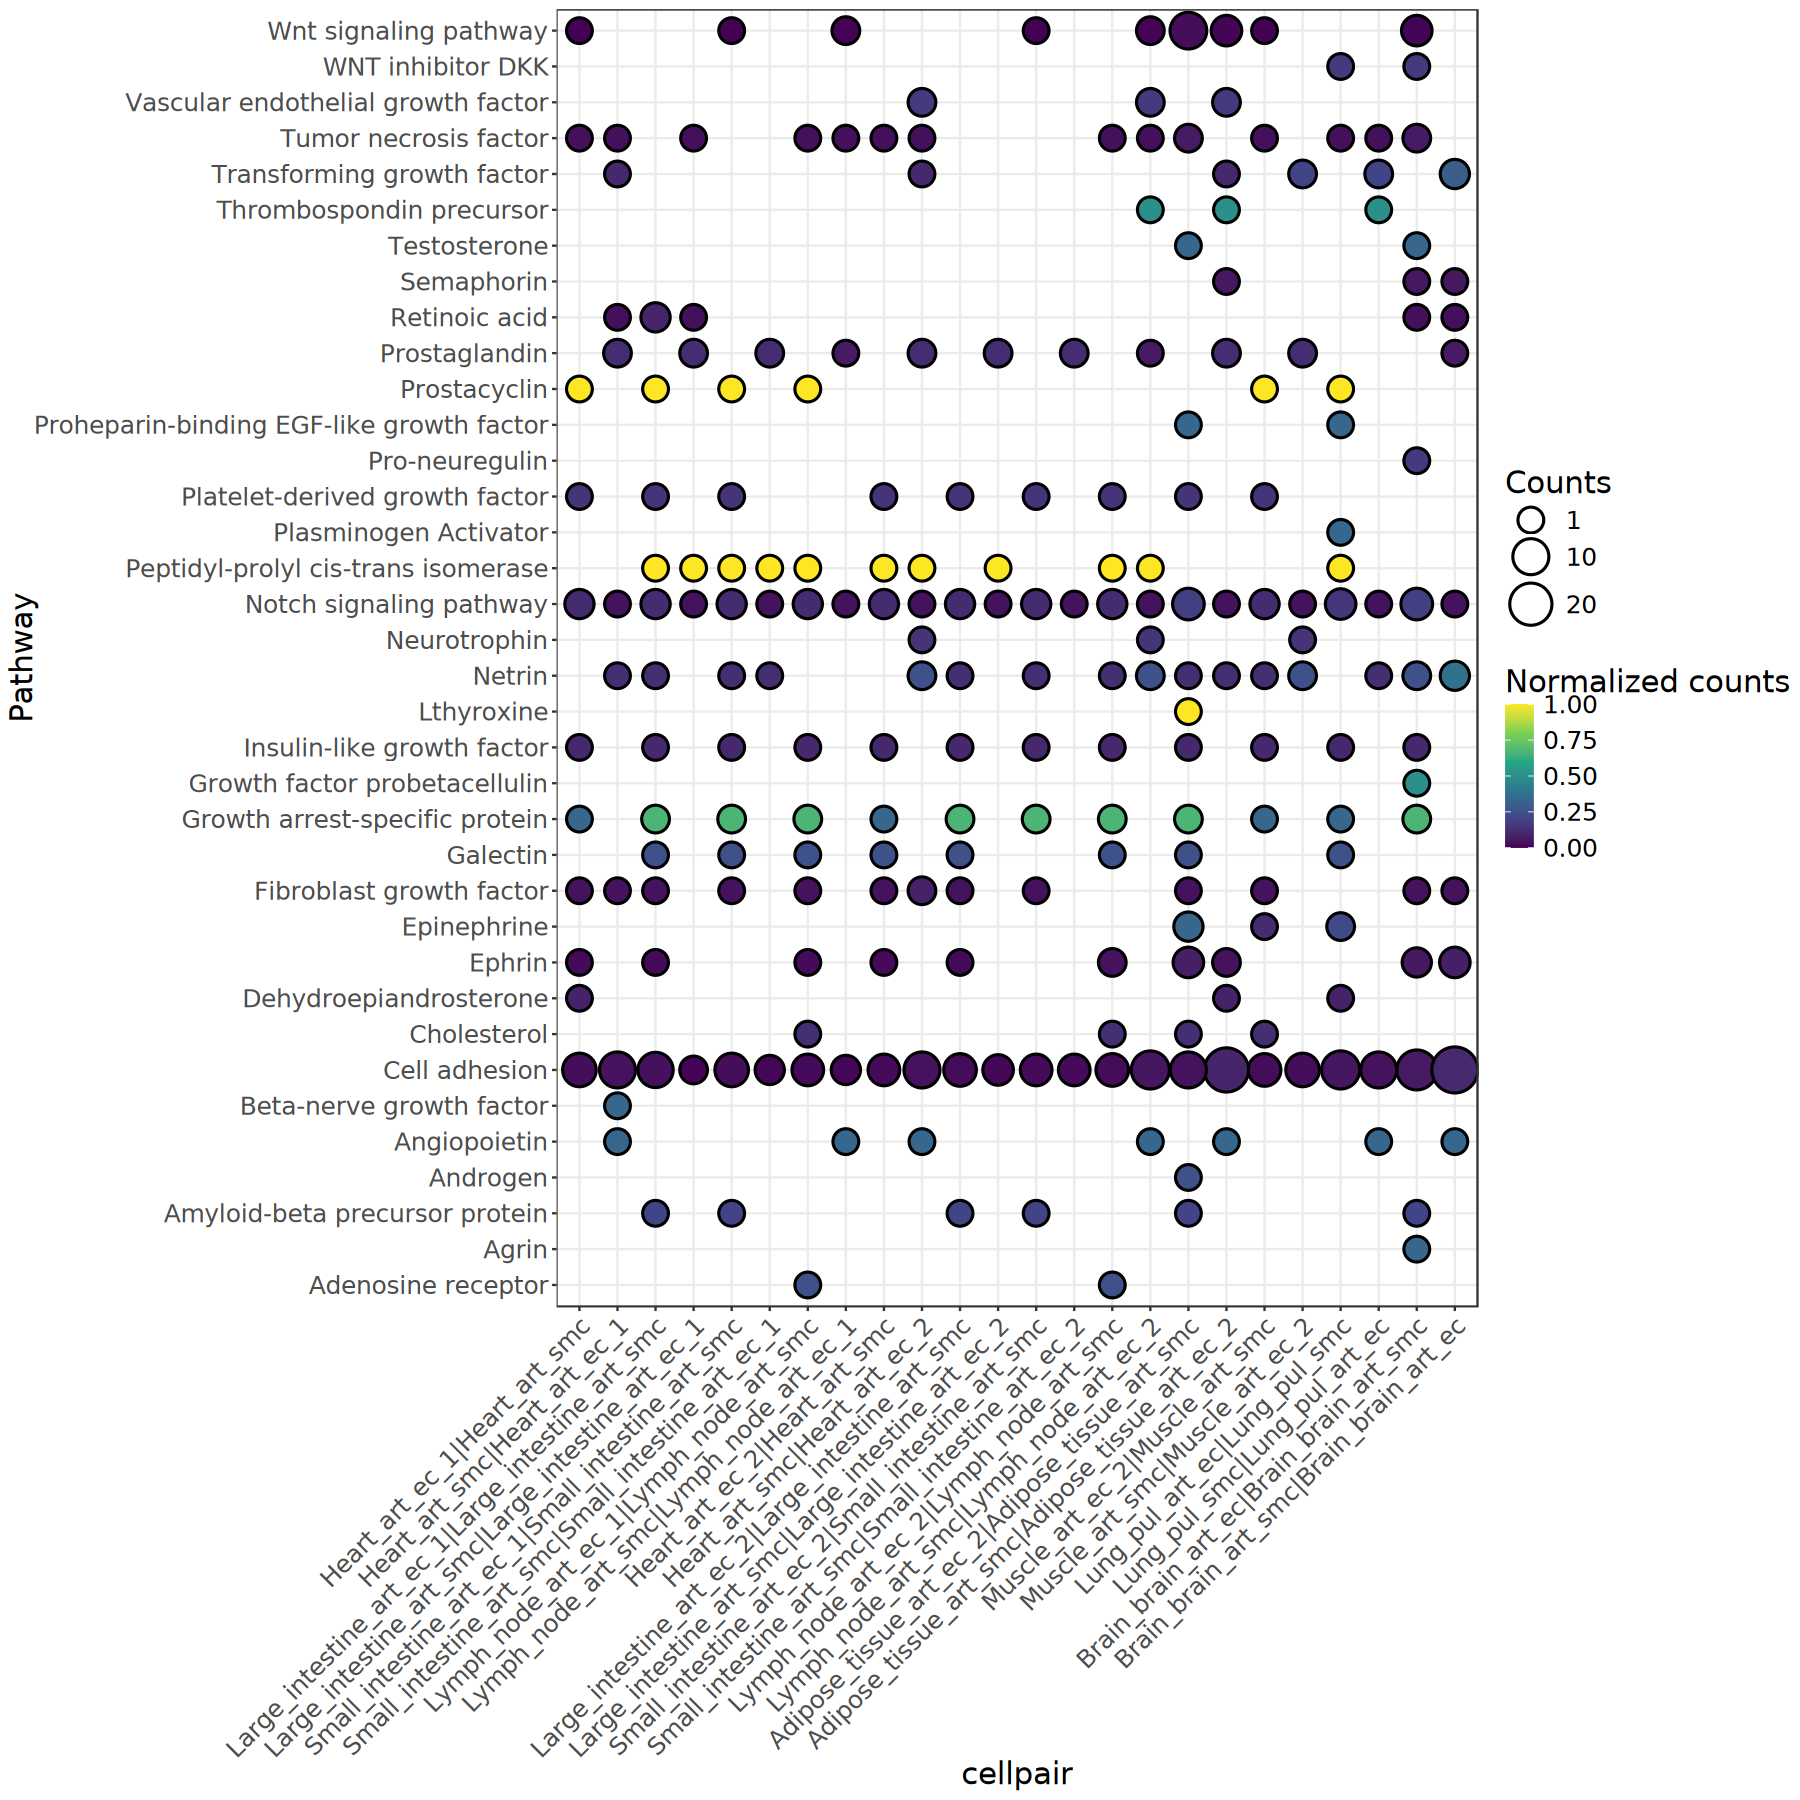

In [49]:
desired_order <- pairs  # Specify the desired order of categories
options(repr.plot.width=15, repr.plot.height=15)
c_map <- c('white', 'red')
names(c_map) <- c('no', 'yes')

p <- ggplot(D_subseted) + geom_point(aes(x=cellpair, y=Pathway, size=count, fill=normalized_counts, alpha = count == 0), pch=21, , stroke = 1) + #subset(D, grepl("Uterus.*Uterus", D$cellpair))
scale_alpha_manual(values = c(1,0)) +
scale_fill_viridis_c() + 
#scale_fill_gradientn(colours = c("blue", "green", "yellow", "white")) +
#scale_fill_manual(values = color_scale) +=
scale_size(breaks = c(1, 10, 20, 30, 40, 50), range = c(5, 12)) +
scale_color_manual(values = c_map, limits = c('yes'), name = "Significant") + 
scale_x_discrete(limits = desired_order) +  # Specify the desired order on the x-axis 
theme_bw() + theme(text = element_text(size = 18, family = "Lato"), axis.text.x = element_text(angle = 45, vjust = 1, hjust=1)) + #remove if exporting with ggsave: text = element_text(size = 18), 
labs(size='Counts', fill='Normalized counts') +
guides(alpha = 'none')#, size = guide_legend(order = 1), fill = guide_legend(order = 2), colour = guide_legend(order = 3))

#guides(color= guide_legend(), size=guide_legend()) + guides(alpha = 'none') +
#scale_fill_gradientn(colours = c("darkred", "orange", "yellow", "white"))#+ theme(legend.position = "none")

p

ggsave(
  file.path(output_p, "all_organs_art_smc.png"), 
  p,
  width = 15,
  height = 15,
  dpi = 300)

### ven_ec_1_smc_pc in organs of interest

In [50]:
pairs = c("Heart_ven_ec_1|Heart_smc_pc_intermediate", "Heart_smc_pc_intermediate|Heart_ven_ec_1",
          "Uterus_ven_ec_1|Uterus_smc_pc_intermediate", "Uterus_smc_pc_intermediate|Uterus_ven_ec_1",
           "Oesophagus_ven_ec_1|Oesophagus_smc_pc_intermediate", "Oesophagus_smc_pc_intermediate|Oesophagus_ven_ec_1",
           "Lymph_node_ven_ec_1|Lymph_node_smc_pc_intermediate", "Lymph_node_smc_pc_intermediate|Lymph_node_ven_ec_1",
          "Thymus_ven_ec_1|Thymus_smc_pc_intermediate", "Thymus_smc_pc_intermediate|Thymus_ven_ec_1",  
          "Lung_pul_ven_ec|Lung_pul_smc", "Lung_pul_smc|Lung_pul_ven_ec")  #pul_smc added
merged_dfs_long_subset <- merged_dfs_long[merged_dfs_long$cellpair %in% pairs, ]

In [51]:
list_of_cell_pairs = pairs

In [52]:
D_subseted <- subset(D, cellpair %in% list_of_cell_pairs)
head(D_subseted)

,Pathway,cellpair,count,n,normalized_counts
,<chr>,<chr>,<int>,<int>,<dbl>
43,Adenosine receptor,Uterus_smc_pc_intermediate|Uterus_ven_ec_1,0,4,0
66,Adenosine receptor,Lung_pul_ven_ec|Lung_pul_smc,0,4,0
392,Adenosine receptor,Oesophagus_ven_ec_1|Oesophagus_smc_pc_intermediate,0,4,0
518,Adenosine receptor,Uterus_ven_ec_1|Uterus_smc_pc_intermediate,0,4,0
583,Adenosine receptor,Thymus_smc_pc_intermediate|Thymus_ven_ec_1,0,4,0
609,Adenosine receptor,Thymus_ven_ec_1|Thymus_smc_pc_intermediate,0,4,0


In [53]:
D_subseted <- subset(D_subseted, Pathway %in% pull(subset(D_subseted %>%
              group_by(Pathway) %>%
              summarise(sum_by_group = sum(count)), sum_by_group>0)[,1]))

In [54]:
head (D_subseted)

,Pathway,cellpair,count,n,normalized_counts
,<chr>,<chr>,<int>,<int>,<dbl>
2551,Adrenomedullin,Thymus_ven_ec_1|Thymus_smc_pc_intermediate,0,4,0.00
2602,Adrenomedullin,Lymph_node_ven_ec_1|Lymph_node_smc_pc_intermediate,0,4,0.00
2621,Adrenomedullin,Oesophagus_ven_ec_1|Oesophagus_smc_pc_intermediate,0,4,0.00
2704,Adrenomedullin,Uterus_ven_ec_1|Uterus_smc_pc_intermediate,0,4,0.00
2834,Adrenomedullin,Heart_ven_ec_1|Heart_smc_pc_intermediate,0,4,0.00
2894,Adrenomedullin,Thymus_smc_pc_intermediate|Thymus_ven_ec_1,1,4,0.25


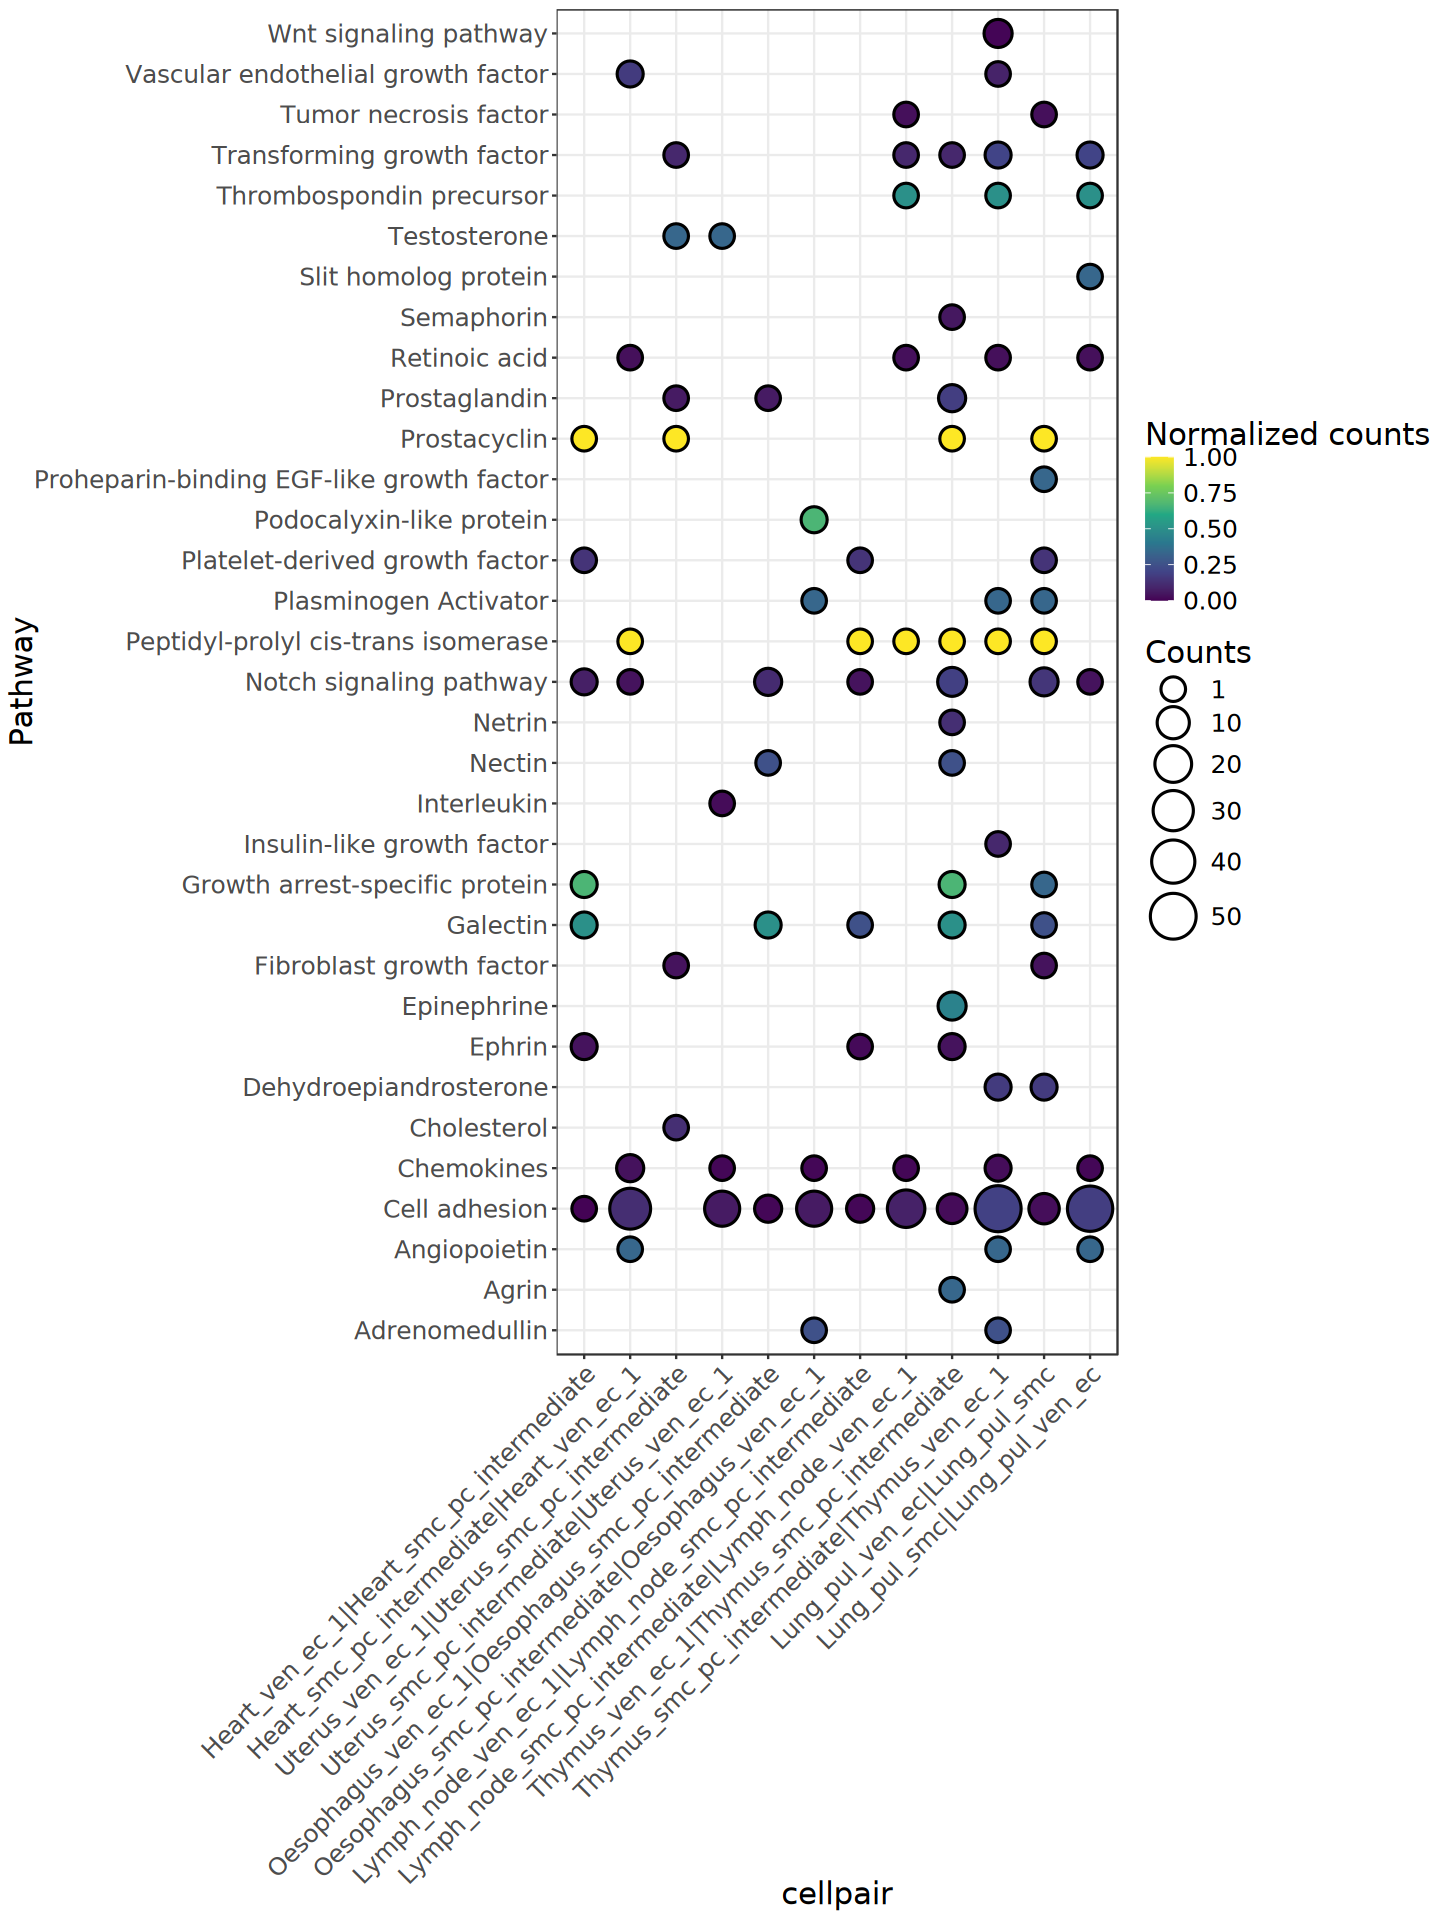

In [55]:
desired_order <- pairs  # Specify the desired order of categories
options(repr.plot.width=12, repr.plot.height=16)
c_map <- c('white', 'red')
names(c_map) <- c('no', 'yes')

p <- ggplot(D_subseted) + geom_point(aes(x=cellpair, y=Pathway, size=count, fill=normalized_counts, alpha = count == 0), pch=21, , stroke = 1) + #subset(D, grepl("Uterus.*Uterus", D$cellpair))
scale_alpha_manual(values = c(1,0)) +
scale_fill_viridis_c() + 
#scale_fill_gradientn(colours = c("blue", "green", "yellow", "white")) +
#scale_fill_manual(values = color_scale) +=
scale_size(breaks = c(1, 10, 20, 30, 40, 50), range = c(5, 12)) +
scale_color_manual(values = c_map, limits = c('yes'), name = "Significant") + 
scale_x_discrete(limits = desired_order) +  # Specify the desired order on the x-axis 
theme_bw() + theme(text = element_text(size = 18, family = "Lato"), axis.text.x = element_text(angle = 45, vjust = 1, hjust=1)) + #remove if exporting with ggsave: text = element_text(size = 18), 
labs(size='Counts', fill='Normalized counts') +
guides(alpha = 'none')#, size = guide_legend(order = 1), fill = guide_legend(order = 2), colour = guide_legend(order = 3))

#guides(color= guide_legend(), size=guide_legend()) + guides(alpha = 'none') +
#scale_fill_gradientn(colours = c("darkred", "orange", "yellow", "white"))#+ theme(legend.position = "none")

p

ggsave(
  file.path(output_p, "all_organs_ven_smc.png"),  
  p,
  width = 12,
  height = 16,
  dpi = 300)

### cap_pc in organs of interest

In [56]:
pairs = c("Heart_myo_cap_ec|Heart_cap_pc", "Heart_cap_pc|Heart_myo_cap_ec",
          "Muscle_myo_cap_ec|Muscle_cap_pc",  "Muscle_cap_pc|Muscle_myo_cap_ec",
          "Uterus_endometrium_cap_ec|Uterus_uterine_pc", "Uterus_uterine_pc|Uterus_endometrium_cap_ec",
          "Decidua_endometrium_cap_ec|Decidua_uterine_pc",   "Decidua_uterine_pc|Decidua_endometrium_cap_ec",
          "Lung_pul_cap_ec|Lung_pul_pc",  "Lung_pul_pc|Lung_pul_cap_ec", 
           "Lung_pul_tip_cap_ec|Lung_pul_pc", "Lung_pul_pc|Lung_pul_tip_cap_ec",
            "Adipose_tissue_adip_cap_ec|Adipose_tissue_cap_pc",  "Adipose_tissue_cap_pc|Adipose_tissue_adip_cap_ec", 
            "Lymph_node_adip_cap_ec|Lymph_node_cap_pc",  "Lymph_node_cap_pc|Lymph_node_adip_cap_ec", 
            "Thymus_adip_cap_ec|Thymus_cap_pc", "Thymus_cap_pc|Thymus_adip_cap_ec", 
            "Pancreas_cap_ec|Pancreas_cap_pc", "Pancreas_cap_pc|Pancreas_cap_ec") 


merged_dfs_long_subset <- merged_dfs_long[merged_dfs_long$cellpair %in% pairs, ]

In [57]:
list_of_cell_pairs = pairs

In [58]:
D_subseted <- subset(D, cellpair %in% list_of_cell_pairs)
head(D_subseted)

,Pathway,cellpair,count,n,normalized_counts
,<chr>,<chr>,<int>,<int>,<dbl>
30,Adenosine receptor,Pancreas_cap_ec|Pancreas_cap_pc,0,4,0
103,Adenosine receptor,Thymus_cap_pc|Thymus_adip_cap_ec,0,4,0
159,Adenosine receptor,Lymph_node_adip_cap_ec|Lymph_node_cap_pc,0,4,0
217,Adenosine receptor,Thymus_adip_cap_ec|Thymus_cap_pc,0,4,0
249,Adenosine receptor,Lymph_node_cap_pc|Lymph_node_adip_cap_ec,0,4,0
250,Adenosine receptor,Adipose_tissue_cap_pc|Adipose_tissue_adip_cap_ec,0,4,0


In [59]:
D_subseted <- subset(D_subseted, Pathway %in% pull(subset(D_subseted %>%
              group_by(Pathway) %>%
              summarise(sum_by_group = sum(count)), sum_by_group>0)[,1]))

In [60]:
head (D_subseted)

,Pathway,cellpair,count,n,normalized_counts
,<chr>,<chr>,<int>,<int>,<dbl>
2546,Adrenomedullin,Uterus_uterine_pc|Uterus_endometrium_cap_ec,0,4,0
2565,Adrenomedullin,Thymus_adip_cap_ec|Thymus_cap_pc,0,4,0
2578,Adrenomedullin,Lung_pul_cap_ec|Lung_pul_pc,0,4,0
2655,Adrenomedullin,Lung_pul_tip_cap_ec|Lung_pul_pc,0,4,0
2733,Adrenomedullin,Muscle_myo_cap_ec|Muscle_cap_pc,0,4,0
2773,Adrenomedullin,Decidua_endometrium_cap_ec|Decidua_uterine_pc,0,4,0


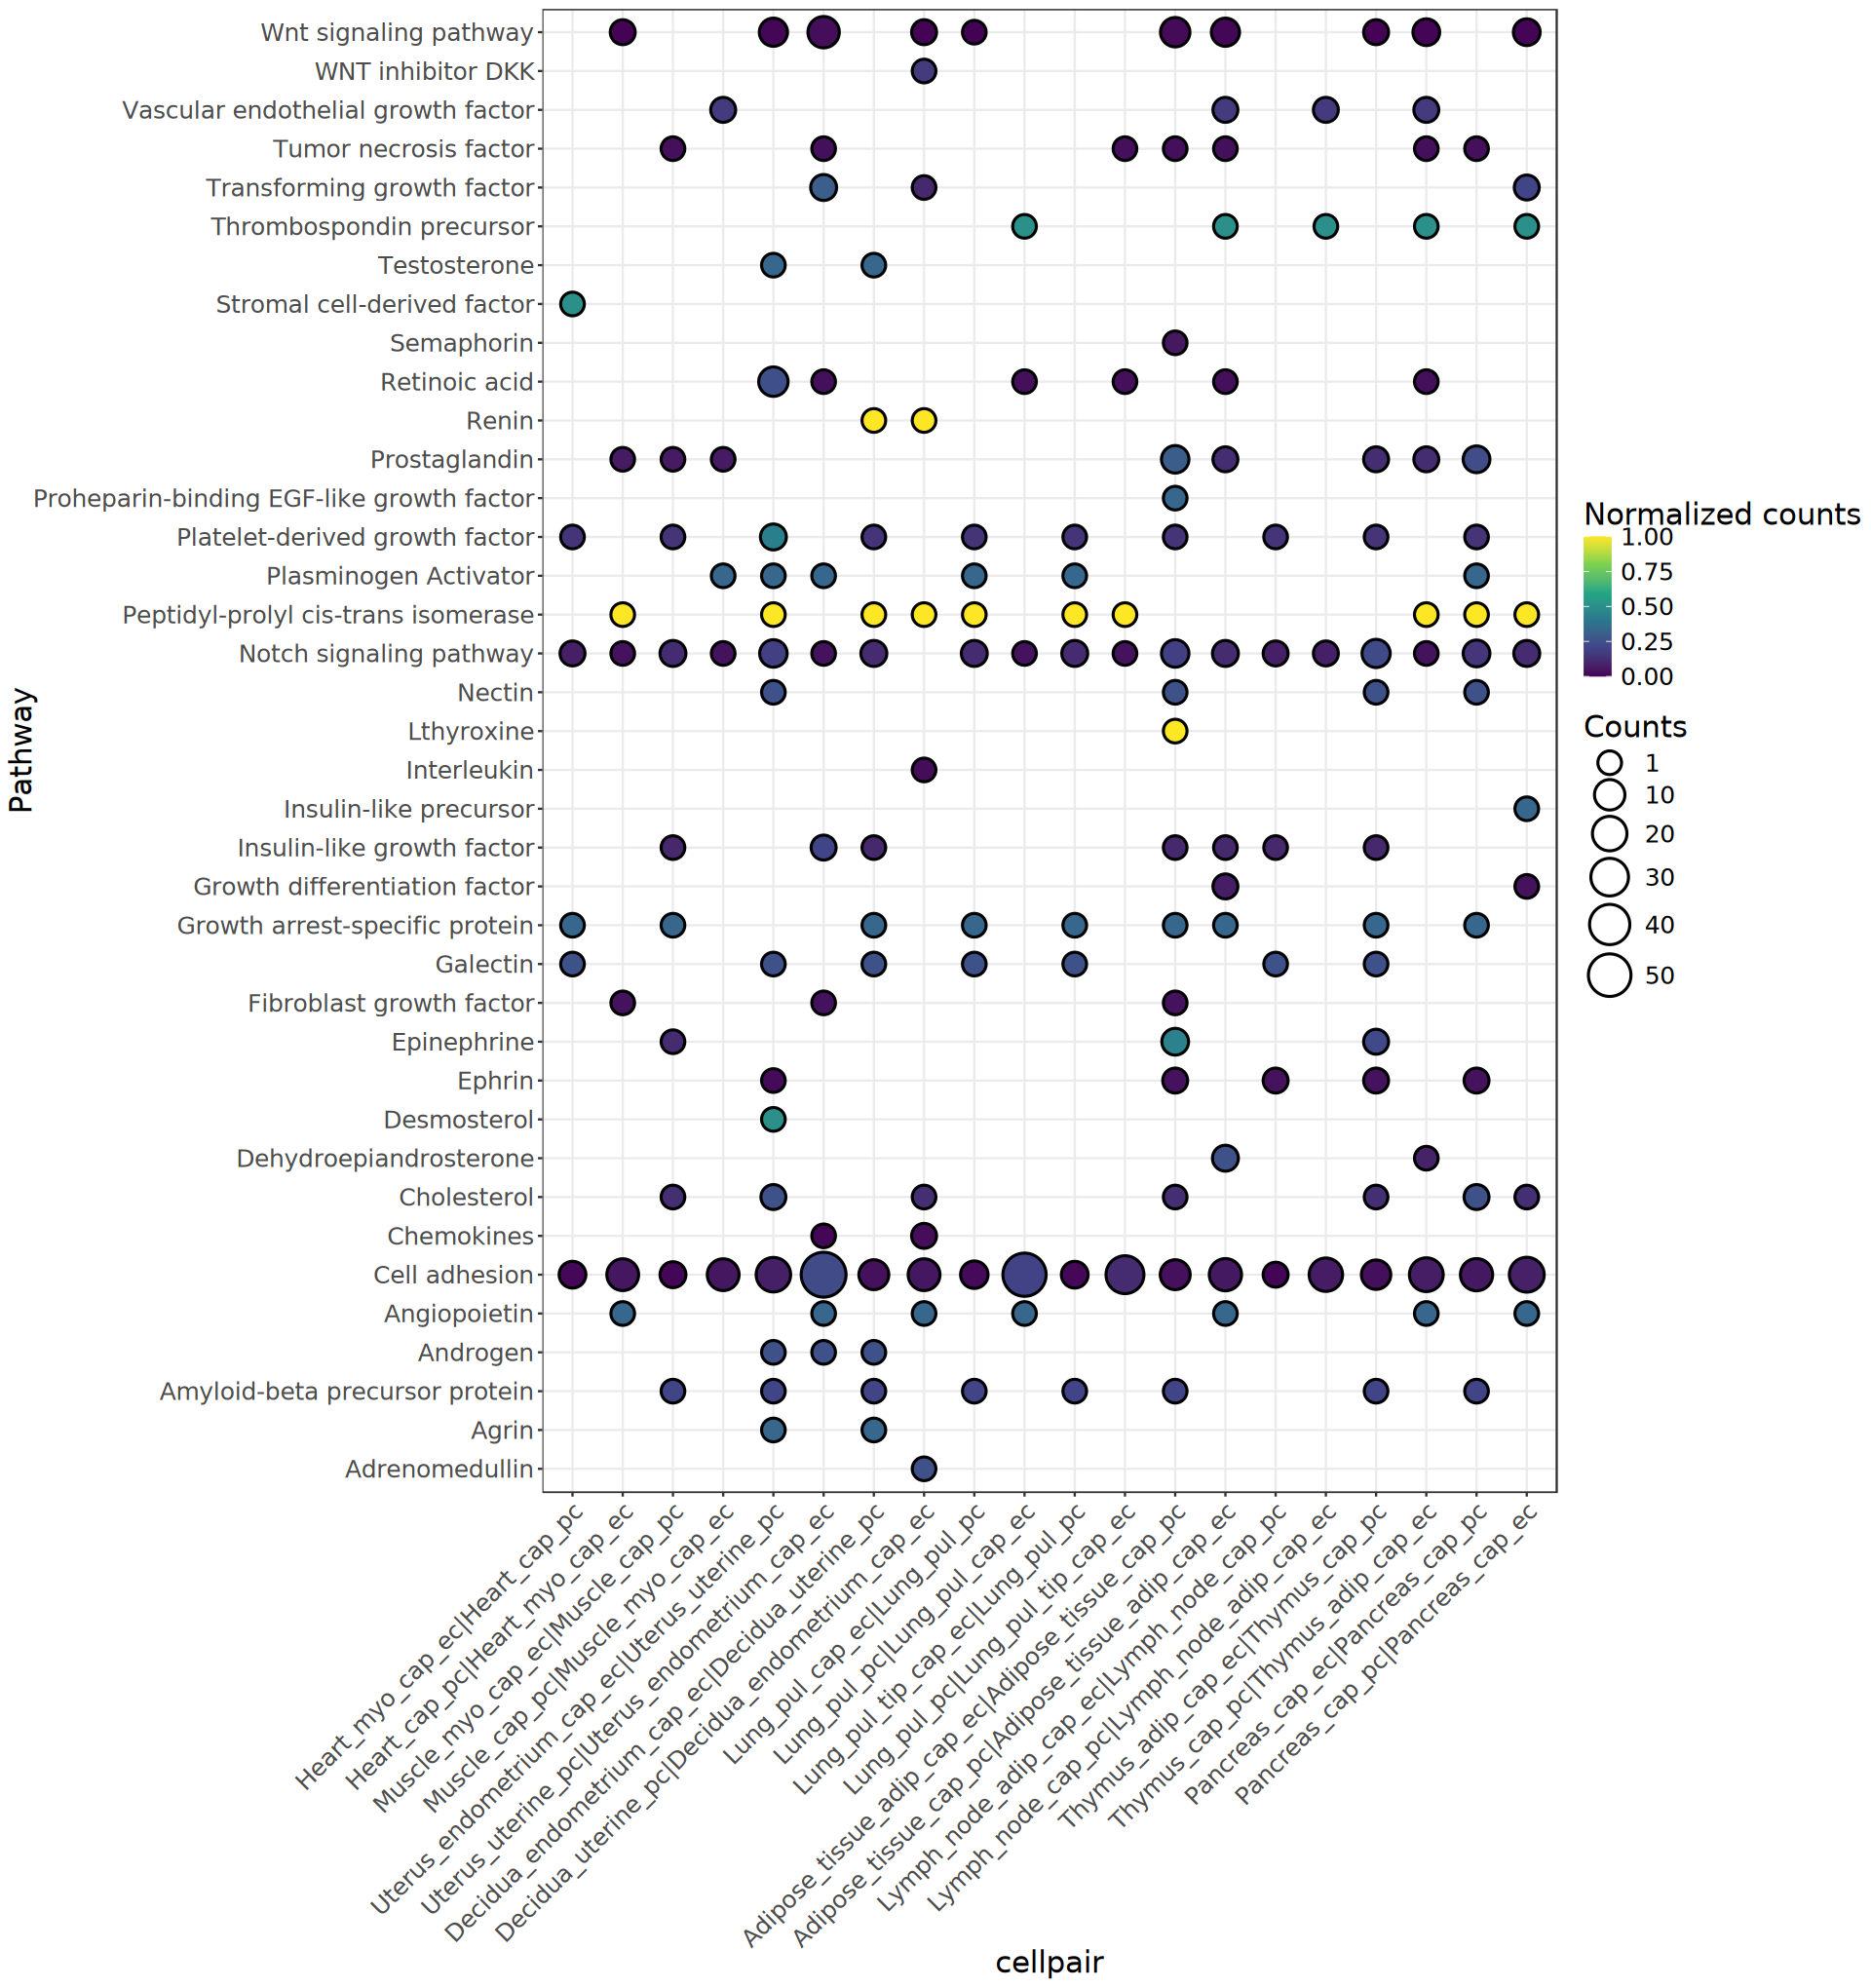

In [61]:
desired_order <- pairs  # Specify the desired order of categories
options(repr.plot.width=16, repr.plot.height=17)
c_map <- c('white', 'red')
names(c_map) <- c('no', 'yes')

p <- ggplot(D_subseted) + geom_point(aes(x=cellpair, y=Pathway, size=count, fill=normalized_counts, alpha = count == 0), pch=21, , stroke = 1) + #subset(D, grepl("Uterus.*Uterus", D$cellpair))
scale_alpha_manual(values = c(1,0)) +
scale_fill_viridis_c() + 
#scale_fill_gradientn(colours = c("blue", "green", "yellow", "white")) +
#scale_fill_manual(values = color_scale) +=
scale_size(breaks = c(1, 10, 20, 30, 40, 50), range = c(5, 12)) +
scale_color_manual(values = c_map, limits = c('yes'), name = "Significant") + 
scale_x_discrete(limits = desired_order) +  # Specify the desired order on the x-axis 
theme_bw() + theme(text = element_text(size = 18, family = "Lato"), axis.text.x = element_text(angle = 45, vjust = 1, hjust=1)) + #remove if exporting with ggsave: text = element_text(size = 18), 
labs(size='Counts', fill='Normalized counts') +
guides(alpha = 'none')#, size = guide_legend(order = 1), fill = guide_legend(order = 2), colour = guide_legend(order = 3))

#guides(color= guide_legend(), size=guide_legend()) + guides(alpha = 'none') +
#scale_fill_gradientn(colours = c("darkred", "orange", "yellow", "white"))#+ theme(legend.position = "none")

p


ggsave(
  file.path(output_p, "all_organs_cap_pc.png"), 
  p,
  width = 16,
  height = 17,
  dpi = 300)